In [ ]:
!pip install optuna ydf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 25.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , KFold

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [ ]:
import ydf
import optuna

In [ ]:
[x for x in dir(ydf) if x.endswith("Learner")]

['CartLearner',
 'DecisionTreeLearner',
 'DistributedGradientBoostedTreesLearner',
 'GenericLearner',
 'GradientBoostedTreesLearner',
 'IsolationForestLearner',
 'RandomForestLearner']

In [ ]:
file_d = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/data_description.txt"

In [ ]:
print(file_d)

/content/drive/MyDrive/house-prices-advanced-regression-techniques/data_description.txt


In [ ]:
with open(file_d, "r") as f:
    contents = f.read()
    print(contents)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
file_df = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv"

In [ ]:
df_train = pd.read_csv(file_df)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train = df_train.drop('Id', axis=1)

/tmp/ipython-input-1723870246.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


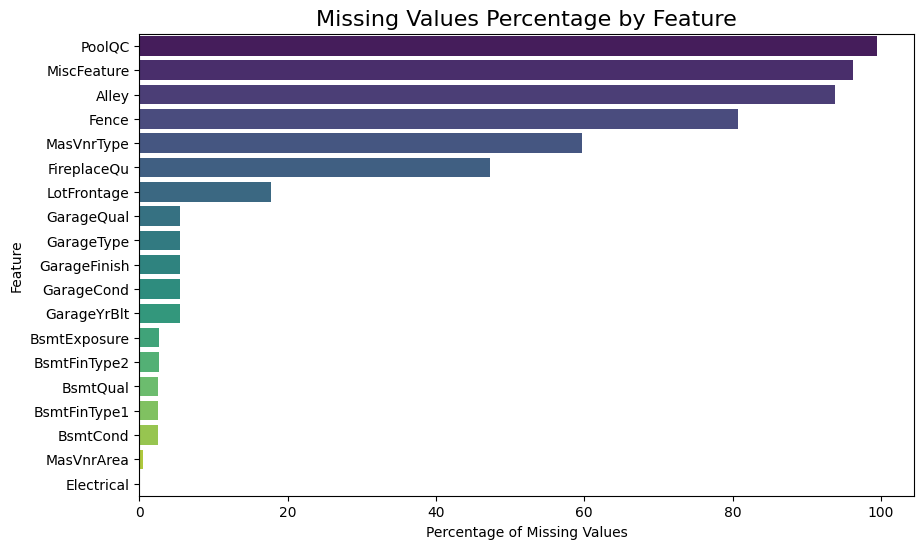

In [ ]:
missing_counts = df_train.isnull().sum()
missing_percent = (missing_counts / len(df_train)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percent
}).sort_values(by='Percentage', ascending=False)

missing_df = missing_df[missing_df['Missing Values'] > 0]

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Percentage',
    y=missing_df.index,
    data=missing_df,
    palette='viridis'
)
plt.title("Missing Values Percentage by Feature", fontsize=16)
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Feature")
plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipython-input-1255858044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


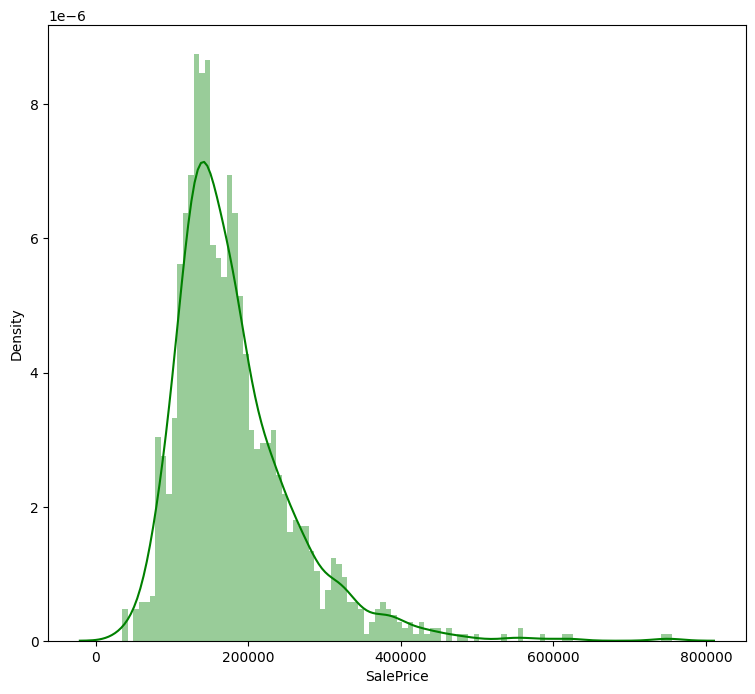

In [ ]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(df_train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


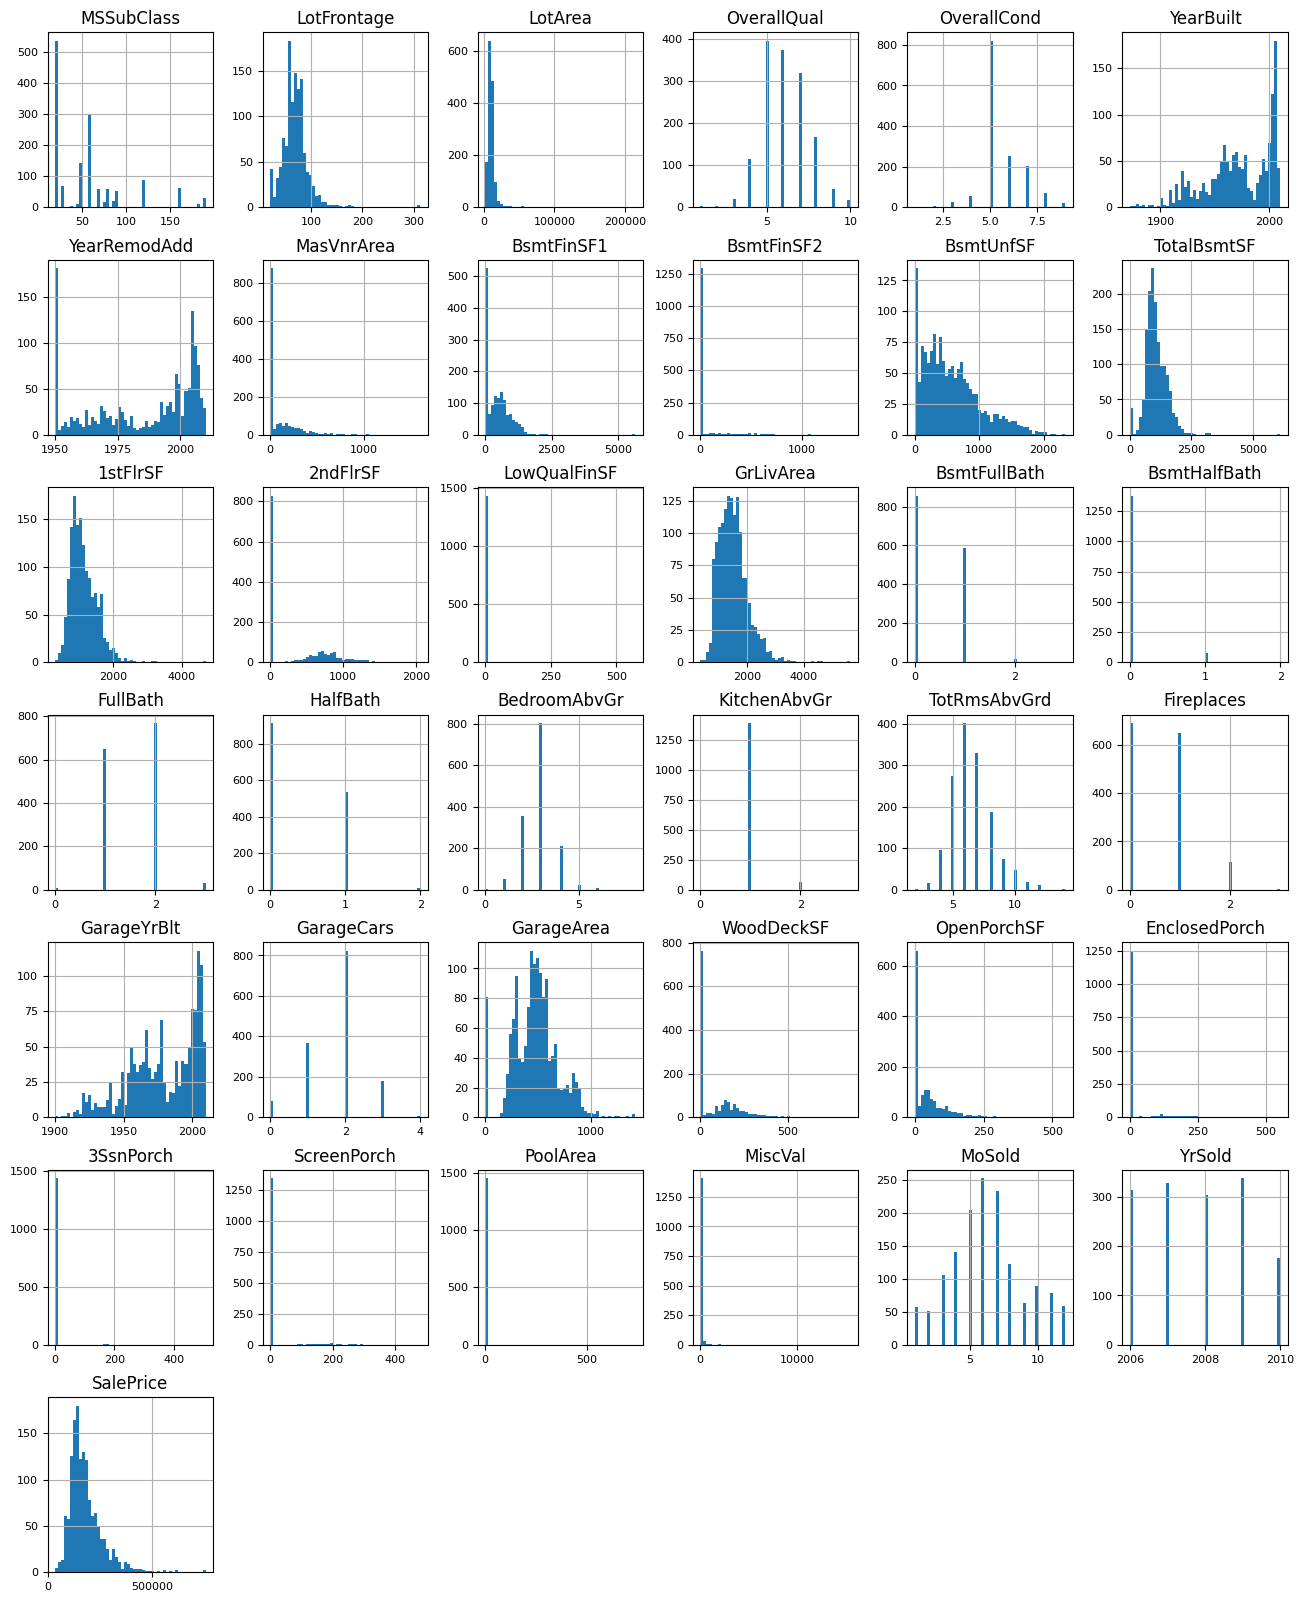

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
train_df.shape

(1168, 80)

In [ ]:
test_df.shape

(292, 80)

In [ ]:
LABEL = "SalePrice"

In [ ]:
def objective(trial):
    learner_name = trial.suggest_categorical(
        "learner",
        ["GradientBoostedTreesLearner", "RandomForestLearner", "CartLearner", "DecisionTreeLearner"]
    )

    if learner_name == "GradientBoostedTreesLearner":
        learner = ydf.GradientBoostedTreesLearner(
            label=LABEL, task=ydf.Task.REGRESSION,
            num_trees=trial.suggest_int("gbt_num_trees", 100, 800),
            max_depth=trial.suggest_int("gbt_max_depth", 3, 12),
            shrinkage=trial.suggest_float("gbt_learning_rate", 0.01, 0.3, log=True),
            subsample=trial.suggest_float("gbt_subsample", 0.6, 1.0),
            l2_regularization=trial.suggest_float("gbt_l2", 0.0, 2.0)
        )

    elif learner_name == "RandomForestLearner":
        learner = ydf.RandomForestLearner(
            label=LABEL, task=ydf.Task.REGRESSION,
            num_trees=trial.suggest_int("rf_num_trees", 200, 1200),
            max_depth=trial.suggest_int("rf_max_depth", 4, 20),
            sampling_with_replacement=trial.suggest_categorical("rf_bootstrap", [True, False]),
            num_candidate_attributes_ratio=trial.suggest_float("rf_feature_frac", 0.2, 1.0)
        )

    elif learner_name == "CartLearner":
        learner = ydf.CartLearner(
            label=LABEL, task=ydf.Task.REGRESSION,
            max_depth=trial.suggest_int("cart_max_depth", 2, 30),
            min_examples=trial.suggest_int("cart_min_examples", 2, 20)
        )

    else:
        learner = ydf.DecisionTreeLearner(
            label=LABEL, task=ydf.Task.REGRESSION,
            max_depth=trial.suggest_int("dt_max_depth", 2, 30),
            min_examples=trial.suggest_int("dt_min_examples", 2, 20)
        )

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmses = []

    for step, (tr_idx, va_idx) in enumerate(kf.split(train_df), start=1):
        fold_train = train_df.iloc[tr_idx]
        fold_valid = train_df.iloc[va_idx]

        model = learner.train(fold_train)
        preds = np.asarray(model.predict(fold_valid.drop(columns=[LABEL]))).reshape(-1)

        rmse = np.sqrt(mean_squared_error(fold_valid[LABEL], preds))
        rmses.append(rmse)

        trial.report(float(np.mean(rmses)), step=step)
        if trial.should_prune():
            raise optuna.TrialPruned()

    return float(np.mean(rmses))

In [ ]:
pruner  = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=5)
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20)

In [ ]:
study = optuna.create_study(direction="minimize", pruner=pruner, sampler=sampler)
study.optimize(objective, n_trials=150)

[I 2025-08-20 02:43:56,522] A new study created in memory with name: no-name-7d62e8b6-ffd8-4b74-8056-e88aa38895b8


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.307841
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:43:58,001] Trial 0 finished with value: 37556.24084791782 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 356, 'rf_max_depth': 6, 'rf_bootstrap': False, 'rf_feature_frac': 0.6808920093945671}. Best is trial 0 with value: 37556.24084791782.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008526
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:43:58,141] Trial 1 finished with value: 44498.86095434613 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 8, 'cart_min_examples': 5}. Best is trial 0 with value: 37556.24084791782.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.007778
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:43:58,283] Trial 2 finished with value: 42603.15147765048 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 10, 'cart_min_examples': 13}. Best is trial 0 with value: 37556.24084791782.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.011325
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:43:58,432] Trial 3 finished with value: 44250.14719120514 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 24, 'dt_min_examples': 5}. Best is trial 0 with value: 37556.24084791782.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.005899
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:43:58,570] Trial 4 finished with value: 45400.98429514448 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 6, 'dt_min_examples': 3}. Best is trial 0 with value: 37556.24084791782.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.950945
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:01,638] Trial 5 finished with value: 30792.403439173504 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 297, 'rf_max_depth': 15, 'rf_bootstrap': True, 'rf_feature_frac': 0.5961415280890161}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.801120
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:07,481] Trial 6 finished with value: 31931.92661873873 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 512, 'rf_max_depth': 12, 'rf_bootstrap': True, 'rf_feature_frac': 0.9756677022116469}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.562542
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:09,323] Trial 7 finished with value: 34053.69369293414 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1122, 'rf_max_depth': 5, 'rf_bootstrap': True, 'rf_feature_frac': 0.4602642646106115}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008810
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:09,471] Trial 8 finished with value: 43394.85337878184 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 10, 'cart_min_examples': 12}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.012239
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:09,628] Trial 9 finished with value: 44250.14719120514 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 24, 'dt_min_examples': 5}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.720391
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:12,111] Trial 10 finished with value: 35578.6370021911 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 972, 'rf_max_depth': 5, 'rf_bootstrap': True, 'rf_feature_frac': 0.890482740700475}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.154151
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:21,408] Trial 11 finished with value: 35158.66224039377 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 327, 'gbt_max_depth': 10, 'gbt_learning_rate': 0.0874479618932312, 'gbt_subsample': 0.9548850970305306, 'gbt_l2': 0.9444298503238986}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008615
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:21,550] Trial 12 finished with value: 43929.6420149587 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 24, 'cart_min_examples': 11}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.730942
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:34,670] Trial 13 finished with value: 34011.958679505915 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 122, 'gbt_max_depth': 9, 'gbt_learning_rate': 0.029130095015495922, 'gbt_subsample': 0.8034282764658811, 'gbt_l2': 1.815132947852186}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.003974
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:34,805] Trial 14 finished with value: 48417.20018583903 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 4, 'cart_min_examples': 7}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.826020
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:47,158] Trial 15 finished with value: 34474.93677522058 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1072, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.6314737935325205}. Best is trial 5 with value: 30792.403439173504.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.820550
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:44:49,907] Trial 16 finished with value: 29852.277122079828 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 428, 'rf_max_depth': 11, 'rf_bootstrap': False, 'rf_feature_frac': 0.20556170442495258}. Best is trial 16 with value: 29852.277122079828.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:05.983863
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:17,795] Trial 17 finished with value: 33728.17144997132 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 336, 'gbt_max_depth': 12, 'gbt_learning_rate': 0.030019946952402964, 'gbt_subsample': 0.8075162486973464, 'gbt_l2': 1.4060379177903557}. Best is trial 16 with value: 29852.277122079828.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.572171
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:22,717] Trial 18 finished with value: 31298.07962840224 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 697, 'rf_max_depth': 9, 'rf_bootstrap': True, 'rf_feature_frac': 0.6876514671839176}. Best is trial 16 with value: 29852.277122079828.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008903
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:22,860] Trial 19 finished with value: 44048.63362016471 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 8, 'dt_min_examples': 4}. Best is trial 16 with value: 29852.277122079828.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.420578
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:24,398] Trial 20 finished with value: 29916.72080903898 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 204, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.22671426505681275}. Best is trial 16 with value: 29852.277122079828.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.488925
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:25,978] Trial 21 finished with value: 29754.195131307348 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 215, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.2053802981691915}. Best is trial 21 with value: 29754.195131307348.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.454788
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:27,571] Trial 22 finished with value: 29899.004253356234 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 208, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.2247226264006926}. Best is trial 21 with value: 29754.195131307348.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.046173
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:31,132] Trial 23 finished with value: 29745.38970565209 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 469, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.20226496155733803}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.365136
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:35,699] Trial 24 finished with value: 30686.469430320107 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 485, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.3468763435546187}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.336131
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:39,950] Trial 25 finished with value: 30648.444897079393 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 494, 'rf_max_depth': 12, 'rf_bootstrap': False, 'rf_feature_frac': 0.3472187471338826}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.384486
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:44,645] Trial 26 finished with value: 29800.27524031594 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 638, 'rf_max_depth': 12, 'rf_bootstrap': False, 'rf_feature_frac': 0.2166724228318529}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.129355
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:51,408] Trial 27 finished with value: 30827.6212478525 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 696, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.3567431908414763}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.326897
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:45:58,908] Trial 28 finished with value: 30168.608628863705 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 851, 'rf_max_depth': 14, 'rf_bootstrap': False, 'rf_feature_frac': 0.28991857678147054}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.031364
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:05,325] Trial 29 finished with value: 32176.732287216466 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 614, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.48121732650656956}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.105050
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:05,903] Trial 30 finished with value: 30803.07958725185 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 786, 'gbt_max_depth': 3, 'gbt_learning_rate': 0.2776777411958814, 'gbt_subsample': 0.6018960478612357, 'gbt_l2': 0.031836934600025124}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.602616
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:07,920] Trial 31 finished with value: 29868.400930957123 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 366, 'rf_max_depth': 10, 'rf_bootstrap': False, 'rf_feature_frac': 0.20024965845819537}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.150476
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:11,783] Trial 32 finished with value: 30335.474870010763 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 582, 'rf_max_depth': 10, 'rf_bootstrap': False, 'rf_feature_frac': 0.2925950549495431}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.977943
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:14,885] Trial 33 finished with value: 29840.483781258517 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 415, 'rf_max_depth': 13, 'rf_bootstrap': False, 'rf_feature_frac': 0.21608229265028112}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.111758
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:21,659] Trial 34 finished with value: 30151.94160117756 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 782, 'rf_max_depth': 14, 'rf_bootstrap': False, 'rf_feature_frac': 0.28928347238566604}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.957941
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:24,731] Trial 35 finished with value: 31598.46607399409 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 298, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.43212839190682084}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008120
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:24,878] Trial 36 finished with value: 43841.77853463791 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 30, 'dt_min_examples': 18}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.455621
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:29,828] Trial 37 finished with value: 30171.29623225211 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 595, 'rf_max_depth': 13, 'rf_bootstrap': False, 'rf_feature_frac': 0.2788848091121726}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.009200
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:29,976] Trial 38 finished with value: 43715.080968657865 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 29, 'cart_min_examples': 20}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.594622
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:31,870] Trial 39 finished with value: 31726.457110478226 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 412, 'rf_max_depth': 8, 'rf_bootstrap': False, 'rf_feature_frac': 0.3973589898025382}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008122
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:32,015] Trial 40 finished with value: 43715.080968657865 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 14, 'dt_min_examples': 20}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.833092
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:34,794] Trial 41 finished with value: 29855.42998773869 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 434, 'rf_max_depth': 11, 'rf_bootstrap': False, 'rf_feature_frac': 0.2060387244532509}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.725870
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:37,316] Trial 42 finished with value: 29912.383852209965 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 293, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.2513818093166911}. Best is trial 23 with value: 29745.38970565209.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.066154
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:41,024] Trial 43 finished with value: 29727.16130142559 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 523, 'rf_max_depth': 12, 'rf_bootstrap': False, 'rf_feature_frac': 0.20819555312397262}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.485398
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:45,913] Trial 44 finished with value: 30306.28540367811 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 565, 'rf_max_depth': 13, 'rf_bootstrap': False, 'rf_feature_frac': 0.3101008725056697}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.703737
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:51,689] Trial 45 finished with value: 30135.850688942544 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 653, 'rf_max_depth': 14, 'rf_bootstrap': False, 'rf_feature_frac': 0.26845980830340643}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.007825
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:51,833] Trial 46 finished with value: 43715.080968657865 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 18, 'cart_min_examples': 20}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.272146
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:46:56,078] Trial 47 finished with value: 30077.662514416017 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 502, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.2577810829057178}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.730177
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:01,530] Trial 48 finished with value: 31225.683339047173 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 777, 'gbt_max_depth': 4, 'gbt_learning_rate': 0.010218974484127768, 'gbt_subsample': 0.6156602272221416, 'gbt_l2': 0.1888695110218278}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.542021
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:03,387] Trial 49 finished with value: 30750.838513119117 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 767, 'rf_max_depth': 7, 'rf_bootstrap': False, 'rf_feature_frac': 0.20174699931456705}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.152736
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:07,064] Trial 50 finished with value: 32700.828426448916 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 339, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.5252786436561967}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.774653
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:09,765] Trial 51 finished with value: 29863.280377111205 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 422, 'rf_max_depth': 11, 'rf_bootstrap': False, 'rf_feature_frac': 0.20352697990659135}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.976022
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:13,075] Trial 52 finished with value: 30549.721817959784 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 382, 'rf_max_depth': 12, 'rf_bootstrap': False, 'rf_feature_frac': 0.3318609626984805}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.902267
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:16,082] Trial 53 finished with value: 30061.547216719788 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 448, 'rf_max_depth': 11, 'rf_bootstrap': False, 'rf_feature_frac': 0.24888257310139156}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.771024
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:21,865] Trial 54 finished with value: 31323.872847368428 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 533, 'rf_max_depth': 13, 'rf_bootstrap': True, 'rf_feature_frac': 0.7336325068521565}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.003508
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:21,998] Trial 55 finished with value: 50254.85036457173 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 3, 'dt_min_examples': 13}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.015686
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:22,163] Trial 56 finished with value: 44158.21312680985 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 18, 'cart_min_examples': 3}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.632658
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:24,200] Trial 57 finished with value: 30081.65468222062 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 256, 'rf_max_depth': 15, 'rf_bootstrap': False, 'rf_feature_frac': 0.26280056605813884}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.256563
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:25,401] Trial 58 finished with value: 32911.963378840555 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 561, 'gbt_max_depth': 6, 'gbt_learning_rate': 0.2921343358000686, 'gbt_subsample': 0.9678381778758314, 'gbt_l2': 0.8920288649051558}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.178463
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:29,441] Trial 59 finished with value: 30216.155734337444 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 641, 'rf_max_depth': 10, 'rf_bootstrap': True, 'rf_feature_frac': 0.37929707059478157}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.835511
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:32,280] Trial 60 finished with value: 39577.42097990174 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 336, 'rf_max_depth': 9, 'rf_bootstrap': False, 'rf_feature_frac': 0.8634126620546778}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.868160
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:35,208] Trial 61 finished with value: 29803.66879501287 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 460, 'rf_max_depth': 11, 'rf_bootstrap': False, 'rf_feature_frac': 0.20216950809309786}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.065422
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:38,602] Trial 62 finished with value: 29970.428573130586 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 462, 'rf_max_depth': 12, 'rf_bootstrap': False, 'rf_feature_frac': 0.24291477344520643}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.188747
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:42,554] Trial 63 finished with value: 29769.54576823488 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 538, 'rf_max_depth': 12, 'rf_bootstrap': False, 'rf_feature_frac': 0.23809964322310656}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.401231
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:47,266] Trial 64 finished with value: 30329.989792342687 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 544, 'rf_max_depth': 13, 'rf_bootstrap': False, 'rf_feature_frac': 0.31343364883859226}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.134028
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:51,058] Trial 65 finished with value: 30089.01467566479 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 531, 'rf_max_depth': 15, 'rf_bootstrap': True, 'rf_feature_frac': 0.2306256820304408}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.319656
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:55,540] Trial 66 finished with value: 29851.739372999775 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 658, 'rf_max_depth': 11, 'rf_bootstrap': False, 'rf_feature_frac': 0.2374380708716712}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.245043
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:47:59,672] Trial 67 finished with value: 29788.835885636712 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 497, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.23905008632664174}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.038454
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:06,465] Trial 68 finished with value: 30362.109206609242 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 745, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.3182417998491701}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.383319
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:08,378] Trial 69 finished with value: 33577.205988362424 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 588, 'gbt_max_depth': 6, 'gbt_learning_rate': 0.09764078514435641, 'gbt_subsample': 0.7083659182302533, 'gbt_l2': 1.9348724105381643}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.009192
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:08,526] Trial 70 finished with value: 43929.6420149587 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 15, 'dt_min_examples': 11}. Best is trial 43 with value: 29727.16130142559.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.050239
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:12,243] Trial 71 finished with value: 29723.11100580486 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 492, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20055407321150234}. Best is trial 71 with value: 29723.11100580486.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.255240
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:16,468] Trial 72 finished with value: 29878.80435265928 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 509, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.24712128328962457}. Best is trial 71 with value: 29723.11100580486.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.208972
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:20,393] Trial 73 finished with value: 30146.004708375112 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 468, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.2800703662554408}. Best is trial 71 with value: 29723.11100580486.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.439680
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:25,136] Trial 74 finished with value: 29813.586412028977 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 600, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.22297733480136045}. Best is trial 71 with value: 29723.11100580486.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.285712
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:29,419] Trial 75 finished with value: 29664.54916070522 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 562, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.20194137221479208}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.506601
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:34,323] Trial 76 finished with value: 30112.74751245034 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 574, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.271386824975848}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.002711
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:34,458] Trial 77 finished with value: 57128.26516523544 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 2, 'cart_min_examples': 15}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.305005
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:42,179] Trial 78 finished with value: 29795.26151641384 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 925, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.23757209939118665}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.689358
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:47,716] Trial 79 finished with value: 29987.054047771704 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 689, 'rf_max_depth': 17, 'rf_bootstrap': True, 'rf_feature_frac': 0.3049237809034852}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.662419
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:48:56,325] Trial 80 finished with value: 29772.027321918093 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1020, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.2372816349859643}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.792903
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:05,269] Trial 81 finished with value: 29805.571729075542 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1088, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.23322304613344108}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.404991
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:13,109] Trial 82 finished with value: 29783.794213780344 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 967, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.23984960672691552}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.676386
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:21,800] Trial 83 finished with value: 30193.475105120884 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 979, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.28283430395861847}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.579593
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:30,209] Trial 84 finished with value: 29773.93723068376 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 999, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.22963528158694707}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.362870
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:37,785] Trial 85 finished with value: 29720.705605601906 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 971, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.20310059746856188}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.521427
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:46,027] Trial 86 finished with value: 29707.0605096901 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1049, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.2025577299307986}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.718739
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:54,903] Trial 87 finished with value: 29759.11585488542 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1139, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.2047625819399919}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.009919
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:55,050] Trial 88 finished with value: 43744.25721203373 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 22, 'dt_min_examples': 10}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.170547
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:49:55,736] Trial 89 finished with value: 37149.549444974844 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1078, 'rf_max_depth': 4, 'rf_bootstrap': False, 'rf_feature_frac': 0.20435330382506584}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:04.322037
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:50:09,734] Trial 90 finished with value: 34324.982959673565 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1199, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.6171169545006038}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.034533
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:50:19,583] Trial 91 finished with value: 29763.310546776698 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1192, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.20383199113959893}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.871932
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:50:28,816] Trial 92 finished with value: 29765.02997543082 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1150, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.20277125099837}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.738366
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:50:37,810] Trial 93 finished with value: 29769.470418913435 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1156, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.20910661852563323}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.620831
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:50:46,491] Trial 94 finished with value: 29710.24117803512 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1131, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.2000963867914715}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:10.108132
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:51:16,565] Trial 95 finished with value: 35670.38684399257 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 149, 'gbt_max_depth': 12, 'gbt_learning_rate': 0.013140924703158361, 'gbt_subsample': 0.8827271950501125, 'gbt_l2': 0.4743850142679107}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.011079
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:51:16,727] Trial 96 finished with value: 44096.79996074969 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 30, 'cart_min_examples': 8}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.905637
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:51:26,275] Trial 97 finished with value: 30162.51140988817 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1110, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.26948092365403264}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.720969
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:51:35,221] Trial 98 finished with value: 30131.125265782353 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1031, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.26695325371813505}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.126940
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:51:45,237] Trial 99 finished with value: 29848.59803201863 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1200, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.22016739099486854}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.298663
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:51:55,600] Trial 100 finished with value: 30301.67404475747 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1153, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.2931022686948684}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.745264
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:52:04,699] Trial 101 finished with value: 29767.7636279384 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1157, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.20274050087034423}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:04.522260
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:52:19,143] Trial 102 finished with value: 40955.988374561326 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1119, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.9952487200744622}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.726974
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:52:28,259] Trial 103 finished with value: 29729.950137048294 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1173, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.20064736859274046}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.175629
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:52:35,530] Trial 104 finished with value: 30111.622775105894 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 854, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.26073696678752695}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.840496
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:52:45,064] Trial 105 finished with value: 29836.863323034548 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1171, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.2217266340499633}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.775121
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:52:57,121] Trial 106 finished with value: 31067.636412217722 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1101, 'rf_max_depth': 20, 'rf_bootstrap': True, 'rf_feature_frac': 0.6777776405580769}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.781419
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:06,279] Trial 107 finished with value: 30082.71582855307 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1058, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.25552142556306867}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.973691
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:15,906] Trial 108 finished with value: 29815.54002241509 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1132, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.22396020214104806}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008782
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:16,052] Trial 109 finished with value: 43985.1133967122 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 30, 'dt_min_examples': 15}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.644467
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:24,576] Trial 110 finished with value: 29709.68941461541 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1051, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20335173037031973}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.442826
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:32,778] Trial 111 finished with value: 29685.421185671697 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1060, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20044520770513746}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.544248
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:41,086] Trial 112 finished with value: 29682.33887830922 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1057, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20018010792788699}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.633919
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:49,876] Trial 113 finished with value: 29772.27801215275 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1064, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.22206018409462724}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.634856
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:53:58,666] Trial 114 finished with value: 29933.24787106854 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1051, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.2526078394531172}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:04.122862
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:11,650] Trial 115 finished with value: 39141.1655514953 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1030, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.8571591732210088}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.898593
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:14,935] Trial 116 finished with value: 32664.12172923112 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 442, 'gbt_max_depth': 8, 'gbt_learning_rate': 0.1435295832292862, 'gbt_subsample': 0.7129146641983286, 'gbt_l2': 1.4069436492520317}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.222828
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:22,380] Trial 117 finished with value: 29794.096658745373 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 942, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.222573566584778}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.008644
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:22,528] Trial 118 finished with value: 44020.43530254524 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 23, 'cart_min_examples': 16}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.223640
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:26,477] Trial 119 finished with value: 32095.625146329166 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 392, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.4837760661616539}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.541832
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:35,169] Trial 120 finished with value: 29701.1085830271 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1097, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20012269006831584}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.654399
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:43,964] Trial 121 finished with value: 29701.011860518305 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1092, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20138418119142137}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.748677
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:54:52,796] Trial 122 finished with value: 29796.39220508446 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1087, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.22050218117595644}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.892354
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:02,209] Trial 123 finished with value: 29951.5947833477 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1106, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.24808145573977908}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.497216
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:10,442] Trial 124 finished with value: 29769.651613515594 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1024, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.22047631120429628}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.547913
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:18,925] Trial 125 finished with value: 30075.66296013154 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 999, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.25544430359411663}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.746421
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:30,946] Trial 126 finished with value: 33626.141912117564 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1046, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.5772212953526721}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.170298
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:38,344] Trial 127 finished with value: 29966.39861550668 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1076, 'rf_max_depth': 18, 'rf_bootstrap': True, 'rf_feature_frac': 0.20118482959431364}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.785266
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:47,561] Trial 128 finished with value: 29827.441773459577 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1126, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.23723802893619098}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.226416
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:51,736] Trial 129 finished with value: 30140.452934241603 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 476, 'rf_max_depth': 20, 'rf_bootstrap': False, 'rf_feature_frac': 0.289208854241348}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.290442
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:55:56,016] Trial 130 finished with value: 29805.52740045065 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 557, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.22376409205514047}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.615283
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:04,787] Trial 131 finished with value: 29698.68368015102 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1094, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.2000959122888215}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.962594
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:14,353] Trial 132 finished with value: 29734.800677429957 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1180, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.20039806458887807}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.904646
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:23,859] Trial 133 finished with value: 29834.702243515578 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1171, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.2156110385539526}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.778845
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:33,069] Trial 134 finished with value: 29950.218826406723 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1100, 'rf_max_depth': 19, 'rf_bootstrap': False, 'rf_feature_frac': 0.2433027699247063}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.413844
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:40,965] Trial 135 finished with value: 29704.01832190006 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1005, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.21514909240143623}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.853492
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:50,379] Trial 136 finished with value: 30155.436036662435 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1069, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.26974734466867856}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.549293
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:56:58,636] Trial 137 finished with value: 29777.305449628813 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1012, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.2198165064547545}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.449345
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:07,006] Trial 138 finished with value: 29927.007548643433 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 981, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.24236256957505067}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.250275
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:14,356] Trial 139 finished with value: 29742.949067301513 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 937, 'rf_max_depth': 15, 'rf_bootstrap': False, 'rf_feature_frac': 0.21397120124655614}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.009944
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:14,505] Trial 140 finished with value: 44096.79996074969 and parameters: {'learner': 'DecisionTreeLearner', 'dt_max_depth': 11, 'dt_min_examples': 8}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.629678
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:23,174] Trial 141 finished with value: 29707.528313968945 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1120, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.201065335806865}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.808486
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:32,506] Trial 142 finished with value: 29835.87336777024 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1130, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.23230870182353314}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.587899
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:40,936] Trial 143 finished with value: 29702.036168449136 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1040, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.21398941944542946}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.756284
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:49,838] Trial 144 finished with value: 30064.70823970558 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1042, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.2565223729675468}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.664936
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:57:58,661] Trial 145 finished with value: 29729.152723364637 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1089, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.21439004996822175}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.793391
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:58:03,942] Trial 146 finished with value: 32685.522345308153 and parameters: {'learner': 'GradientBoostedTreesLearner', 'gbt_num_trees': 616, 'gbt_max_depth': 6, 'gbt_learning_rate': 0.0349261425691498, 'gbt_subsample': 0.8953331688045026, 'gbt_l2': 0.5466046224098114}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.449017
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:58:12,135] Trial 147 finished with value: 29764.55675150803 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 1002, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.23054518037112734}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.213738
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:58:19,330] Trial 148 finished with value: 29769.435046401835 and parameters: {'learner': 'RandomForestLearner', 'rf_num_trees': 890, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.23317825714801121}. Best is trial 75 with value: 29664.54916070522.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:00.010467
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 02:58:19,493] Trial 149 finished with value: 44096.79996074969 and parameters: {'learner': 'CartLearner', 'cart_max_depth': 14, 'cart_min_examples': 8}. Best is trial 75 with value: 29664.54916070522.


In [ ]:
print("Best value (CV RMSE):", study.best_value)
print("Best params:", study.best_params)

Best value (CV RMSE): 29664.54916070522
Best params: {'learner': 'RandomForestLearner', 'rf_num_trees': 562, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.20194137221479208}


In [ ]:
best = {'rf_num_trees': 562, 'rf_max_depth': 17, 'rf_bootstrap': False, 'rf_feature_frac': 0.20194137221479208}

In [ ]:
rf = ydf.RandomForestLearner(
    label=LABEL, task=ydf.Task.REGRESSION, random_seed=42,
    num_trees=best['rf_num_trees'],
    max_depth=best['rf_max_depth'],
    sampling_with_replacement=best['rf_bootstrap'],
    num_candidate_attributes_ratio=best['rf_feature_frac']
).train(train_df)

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 1168 examples
Model trained in 0:00:02.090606


In [ ]:
X_test = test_df.drop(columns=[LABEL]); y_test = test_df[LABEL].values

In [ ]:
pred = np.asarray(rf.predict(X_test)).reshape(-1)

In [ ]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Hold-out RMSE:", rmse)

Hold-out RMSE: 27329.23065144718


In [ ]:
y_true = np.log1p(y_test)
y_pred = np.log1p(pred)
log_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Hold-out Log-RMSE:", log_rmse)

Hold-out Log-RMSE: 0.14635374171727833


In [ ]:
rf.describe()

In [ ]:
print("Available importance types:", rf.variable_importances().keys())

Available importance types: dict_keys(['NUM_AS_ROOT', 'SUM_SCORE', 'NUM_NODES', 'INV_MEAN_MIN_DEPTH'])


* SUM_SCORE = Measures how much each feature reduced loss across all splits.
* NUM_AS_ROOT = Counts how many times a feature was chosen at the root of a tree and useful to see which features the model thinks are most globally discriminative.
* NUM_NODES = Counts how many times a feature was used in any split across the whole forest.
* INV_MEAN_MIN_DEPTH = Based on how close to the root a feature tends to appear.

In [ ]:
for imp_type in ["SUM_SCORE", "NUM_AS_ROOT", "NUM_NODES", "INV_MEAN_MIN_DEPTH"]:
    print(f"\nTop features by {imp_type}:")
    raw_fi = rf.variable_importances()[imp_type]

    fi = []
    for a, b in raw_fi:
        if isinstance(a, str):  name, score = a, float(b)
        else:                   name, score = b, float(a)
        fi.append((name, score))

    top = sorted(fi, key=lambda x: x[1], reverse=True)[:10]
    for n, s in top:
        print(f"{n:20s} {s:.2f}")


Top features by SUM_SCORE:
OverallQual          718967708900626.75
Neighborhood         431115652973216.00
GrLivArea            424924435799810.75
GarageCars           296479828182190.50
ExterQual            289231855582012.50
TotalBsmtSF          165493661177848.00
KitchenQual          141705191370404.50
GarageArea           129660587056401.50
1stFlrSF             128830747338709.88
BsmtQual             126059078804820.00

Top features by NUM_AS_ROOT:
OverallQual          124.00
ExterQual            99.00
GarageCars           75.00
Neighborhood         65.00
GrLivArea            49.00
KitchenQual          34.00
YearBuilt            32.00
BsmtQual             23.00
TotalBsmtSF          18.00
GarageArea           15.00

Top features by NUM_NODES:
GrLivArea            9066.00
Neighborhood         9030.00
TotalBsmtSF          5658.00
1stFlrSF             4845.00
LotArea              4667.00
BsmtFinSF1           4596.00
GarageArea           4535.00
Exterior2nd          3592.00
YearRemodAd

In [ ]:
raw_fi = rf.variable_importances()["SUM_SCORE"]

In [ ]:
fi = []
for a, b in raw_fi:
    name = score = None
    if isinstance(a, str) and isinstance(b, (int, float)):
        name, score = a, float(b)
    elif isinstance(a, (int, float)) and isinstance(b, str):
        name, score = b, float(a)
    elif isinstance(a, str) and hasattr(b, "value"):
        name, score = a, float(b.value)
    elif hasattr(a, "value") and isinstance(b, str):
        name, score = b, float(a.value)
    elif isinstance(a, str) and isinstance(b, dict) and "value" in b:
        name, score = a, float(b["value"])
    elif isinstance(b, str) and isinstance(a, dict) and "value" in a:
        name, score = b, float(a["value"])
    else:
        continue
    fi.append((name, score))

In [ ]:
fi_sorted = sorted(fi, key=lambda x: x[1], reverse=True)[:20]
print("Top features by SUM_SCORE:")
for n, s in fi_sorted:
    print(f"{n:20s} {s:.2f}")

Top features by SUM_SCORE:
OverallQual          718967708900626.75
Neighborhood         431115652973216.00
GrLivArea            424924435799810.75
GarageCars           296479828182190.50
ExterQual            289231855582012.50
TotalBsmtSF          165493661177848.00
KitchenQual          141705191370404.50
GarageArea           129660587056401.50
1stFlrSF             128830747338709.88
BsmtQual             126059078804820.00
YearBuilt            104980479751778.00
BsmtFinSF1           78167764980417.00
2ndFlrSF             49914128351044.75
LotArea              49873075893705.00
FullBath             47734789949209.00
TotRmsAbvGrd         42719870885238.50
FireplaceQu          35638500471660.00
GarageYrBlt          34741867810755.25
YearRemodAdd         30551373544406.50
GarageFinish         23217973521273.25


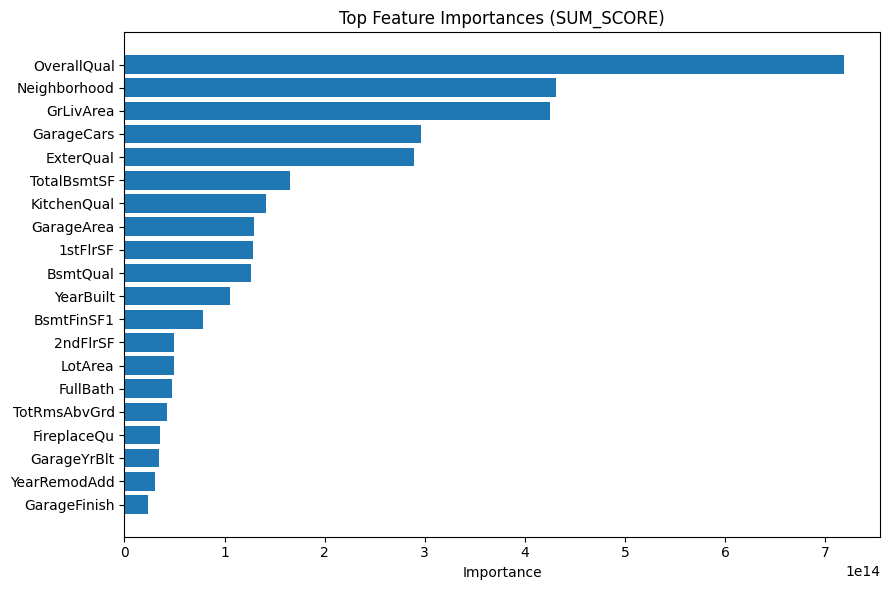

In [ ]:
names  = [n for n, _ in fi_sorted]
scores = [s for _, s in fi_sorted]
plt.figure(figsize=(9,6))
plt.barh(names[::-1], scores[::-1])
plt.title("Top Feature Importances (SUM_SCORE)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

* OverallQual, Neighborhood, GrLivArea dominate — these reduce prediction error the most.
* OverallQual and ExterQual appear as the root split most often ,suggesting they’re the most “globally discriminative” features.
* GarageCars and Neighborhood also get frequent top splits.
* LotArea, BsmtFinSF1, GarageArea also show up a lot, even if they weren’t high in SUM_SCORE. Thus indicating , these features may be less “strong” but very “popular” across trees.
* According to INV_MEAN_MIN_DEPTH - OverallQual, Neighborhood, GrLivArea confirm their consistent role in early decision splits.

**Residual Analysis**
For the following reasons - Model Fit Quality , Homoscedasticity ,Normality of Errors ,Outliers & Leverage

In [ ]:
y_pred = rf.predict(X_test)
residuals = y_test - y_pred

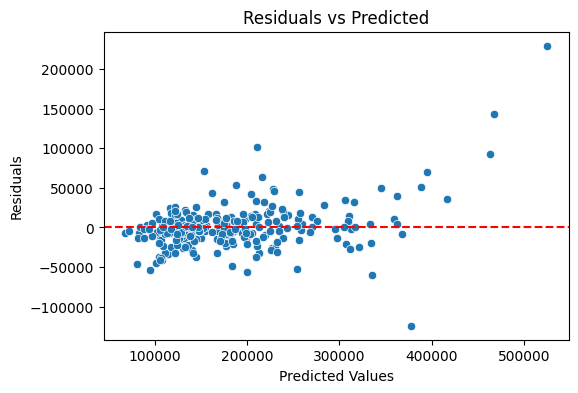

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

Underfits high-value houses → predictions for expensive homes are less reliable and presence of heteroscedasticity → model error increases with predicted value.
Possible Solutions:
* Log transformation of SalesPrice
* FE
* XGBoost / LightGBM

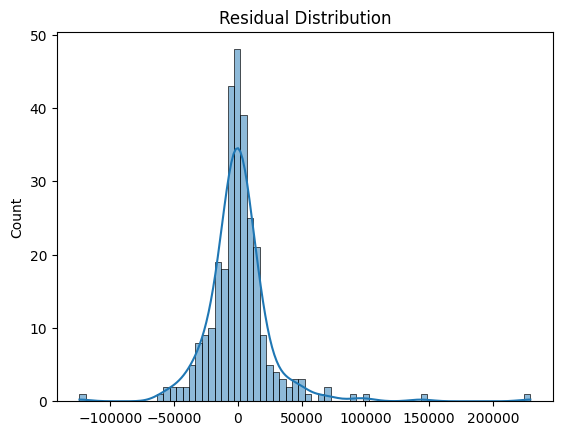

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

Slight skewness and Outliers and high-value houses are harder to predict

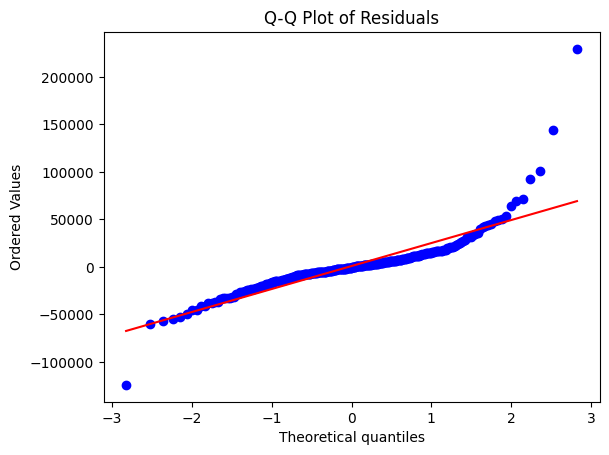

In [ ]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

Model is unbiased for the majority of predictions.

In [ ]:
train_log = train_df.copy()
test_log  = test_df.copy()
train_log[LABEL] = np.log1p(train_log[LABEL])

In [ ]:
rf_log = ydf.RandomForestLearner(
    label=LABEL, task=ydf.Task.REGRESSION, random_seed=42,
    num_trees=best['rf_num_trees'],
    max_depth=best['rf_max_depth'],
    sampling_with_replacement=best['rf_bootstrap'],
    num_candidate_attributes_ratio=best['rf_feature_frac']
).train(train_log)

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 1168 examples
Model trained in 0:00:02.132116


In [ ]:
X_test = test_log.drop(columns=[LABEL])
y_test = test_log[LABEL].values
pred_log = np.asarray(rf_log.predict(X_test)).reshape(-1)
pred = np.expm1(pred_log)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
log_rmse = np.sqrt(mean_squared_error(np.log1p(y_test), pred_log))
print({"holdout_RMSE_dollars": rmse, "holdout_LogRMSE": log_rmse})

{'holdout_RMSE_dollars': np.float64(27490.598247400874), 'holdout_LogRMSE': np.float64(0.14273796173689268)}


In [ ]:
residuals_log = np.log1p(y_test) - pred_log
residuals_dollar = y_test - np.expm1(pred_log)

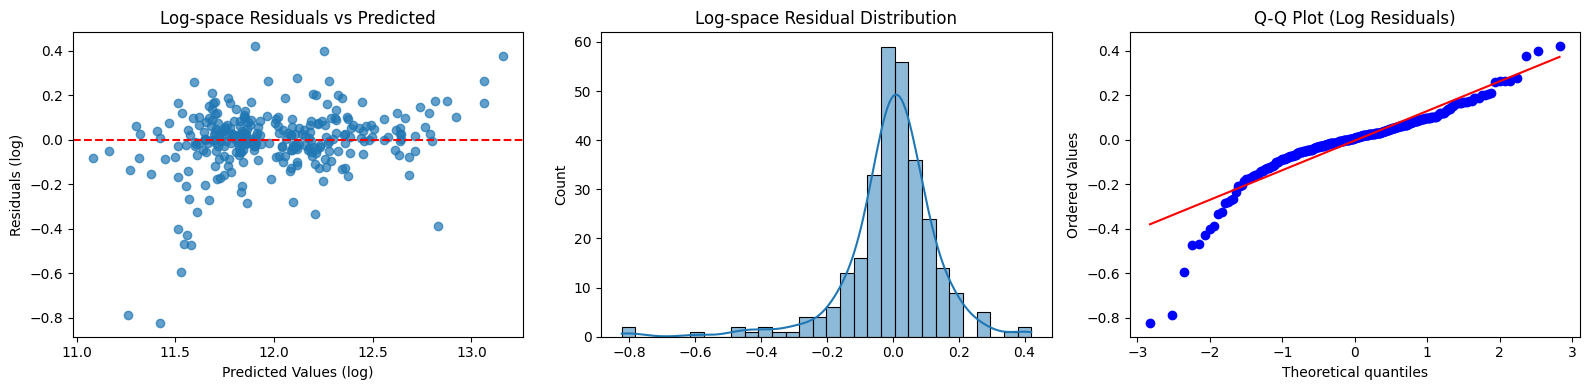

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(pred_log, residuals_log, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values (log)")
plt.ylabel("Residuals (log)")
plt.title("Log-space Residuals vs Predicted")

plt.subplot(1,3,2)
sns.histplot(residuals_log, kde=True, bins=30)
plt.title("Log-space Residual Distribution")

plt.subplot(1,3,3)
stats.probplot(residuals_log, dist="norm", plot=plt)
plt.title("Q-Q Plot (Log Residuals)")

plt.tight_layout()
plt.show()

#Log-space residuals

Residuals vs Predicted: Centered nicely around 0, fairly homoscedastic (variance roughly constant across fitted values). A few deviations, but no obvious funnel shape.

Distribution: Histogram is close to bell-shaped and symmetric.

Q-Q plot: Residuals mostly follow the straight line, with only mild deviation in tails.

Conclusion: In log-space, residuals are approximately normal and homoscedastic. This matches the assumptions of regression modeling, which is why training on log(SalePrice) is statistically sound.

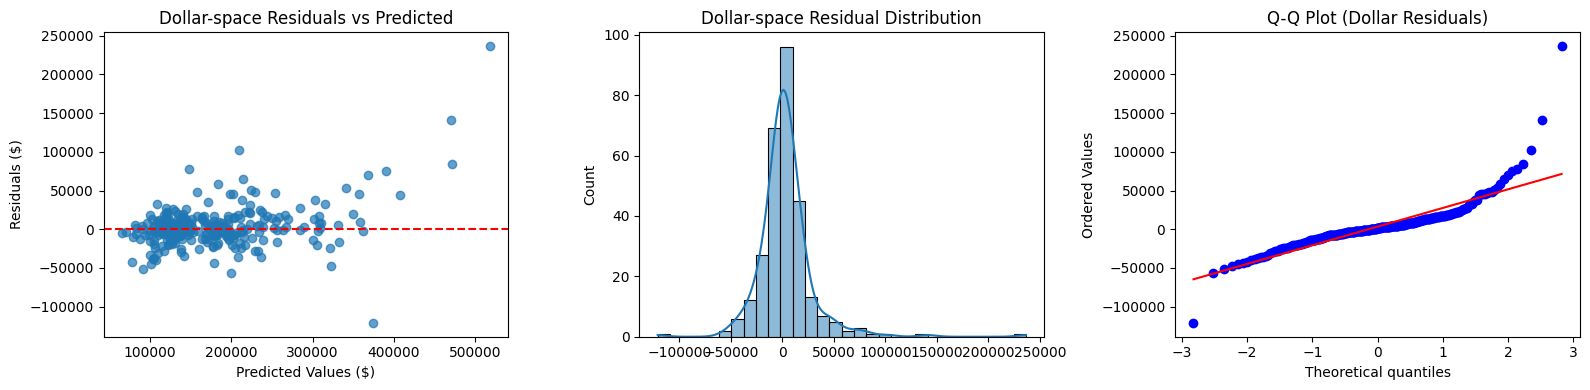

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(np.expm1(pred_log), residuals_dollar, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values ($)")
plt.ylabel("Residuals ($)")
plt.title("Dollar-space Residuals vs Predicted")

plt.subplot(1,3,2)
sns.histplot(residuals_dollar, kde=True, bins=30)
plt.title("Dollar-space Residual Distribution")

plt.subplot(1,3,3)
stats.probplot(residuals_dollar, dist="norm", plot=plt)
plt.title("Q-Q Plot (Dollar Residuals)")

plt.tight_layout()
plt.show()

#Dollar-space residuals

Residuals vs Predicted: Much larger spread at higher predicted prices (clear heteroscedasticity). Expensive houses tend to have bigger absolute errors.

Distribution: Skewed, heavy right tail (some very large positive residuals).

Q-Q plot: Deviations from normality are strong, especially in the upper tail.

Conclusion: On the raw dollar scale, residuals are not homoscedastic and not normal. This is expected, because exponentiating log predictions reintroduces skewness — absolute errors scale with house price.

In [ ]:
rmse_log = np.sqrt(mean_squared_error(np.log1p(y_test), pred_log))
mae_log = mean_absolute_error(np.log1p(y_test), pred_log)

In [ ]:
print("Log-space metrics:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"MAE  (log): {mae_log:.4f}\n")

Log-space metrics:
RMSE (log): 0.1427
MAE  (log): 0.0914



In [ ]:
rmse_dollar = np.sqrt(mean_squared_error(y_test, np.expm1(pred_log)))
mae_dollar = mean_absolute_error(y_test, np.expm1(pred_log))

In [ ]:
print("Dollar-space metrics:")
print(f"RMSE ($): {rmse_dollar:,.0f}")
print(f"MAE  ($): {mae_dollar:,.0f}")

Dollar-space metrics:
RMSE ($): 27,491
MAE  ($): 15,903


In [ ]:
!pip install xgboost lightgbm

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from xgboost.callback import EarlyStopping

In [ ]:
cat_cols = df_train.select_dtypes(include=["object"]).columns.tolist()
df_xgb_lgbm = df_train.copy()
for c in cat_cols:
    df_xgb_lgbm[c] = df_xgb_lgbm[c].astype("category")

In [ ]:
train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)
train_df_xgb_lgbm, test_df_xgb_lgbm = train_test_split(df_xgb_lgbm, test_size=0.2, random_state=42)

train_log = train_df.copy()
train_log[LABEL] = np.log1p(train_log[LABEL])

train_log_xgb_lgbm = train_df_xgb_lgbm.copy()
train_log_xgb_lgbm[LABEL] = np.log1p(train_log_xgb_lgbm[LABEL])

In [ ]:
def objective(trial):
    learner_name = trial.suggest_categorical("learner", ["YDF_GBT", "YDF_RF", "XGB", "LGBM"])
    target_space = trial.suggest_categorical("target_space", ["raw", "log"])

    if learner_name == "YDF_GBT":
        params = dict(
            num_trees=trial.suggest_int("gbt_num_trees", 300, 900),
            max_depth=trial.suggest_int("gbt_max_depth", 3, 7),
            shrinkage=trial.suggest_float("gbt_lr", 0.008, 0.03, log=True),
            subsample=trial.suggest_float("gbt_subsample", 0.6, 1.0),
            l2_regularization=trial.suggest_float("gbt_l2", 0.0, 2.0),
        )
    elif learner_name == "YDF_RF":
        params = dict(
            num_trees=trial.suggest_int("rf_num_trees", 300, 1000),
            max_depth=trial.suggest_int("rf_max_depth", 6, 20),
            sampling_with_replacement=trial.suggest_categorical("rf_bootstrap", [True, False]),
            num_candidate_attributes_ratio=trial.suggest_float("rf_feature_frac", 0.2, 1.0),
        )
    elif learner_name == "XGB":
        params = dict(
            n_estimators=trial.suggest_int("xgb_n_estimators", 300, 1000),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 10),
            learning_rate=trial.suggest_float("xgb_lr", 0.01, 0.3, log=True),
            subsample=trial.suggest_float("xgb_subsample", 0.6, 1.0),
            colsample_bytree=trial.suggest_float("xgb_colsample", 0.6, 1.0),
            reg_lambda=trial.suggest_float("xgb_l2", 0.0, 2.0),
        )
    else:
        params = dict(
            n_estimators=trial.suggest_int("lgbm_n_estimators", 300, 1000),
            max_depth=trial.suggest_int("lgbm_max_depth", 3, 10),
            learning_rate=trial.suggest_float("lgbm_lr", 0.01, 0.3, log=True),
            subsample=trial.suggest_float("lgbm_subsample", 0.6, 1.0),
            colsample_bytree=trial.suggest_float("lgbm_colsample", 0.6, 1.0),
            reg_lambda=trial.suggest_float("lgbm_l2", 0.0, 2.0),
        )

    if learner_name in ["YDF_GBT", "YDF_RF"]:
        data_raw = train_df
        data_log = train_log
    else:
        data_raw = train_df_xgb_lgbm
        data_log = train_log_xgb_lgbm

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    fold_rmse = []

    for step, (tr_idx, va_idx) in enumerate(kf.split(data_raw), start=1):
        if target_space == "raw":
            tr = data_raw.iloc[tr_idx]; va = data_raw.iloc[va_idx]
            y_tr = tr[LABEL].to_numpy(); y_va = va[LABEL].to_numpy()
        else:
            tr = data_log.iloc[tr_idx]; va = data_log.iloc[va_idx]
            y_tr = tr[LABEL].to_numpy(); y_va_log = va[LABEL].to_numpy()

        X_tr = tr.drop(columns=[LABEL]); X_va = va.drop(columns=[LABEL])

        if learner_name == "YDF_GBT":
            learner = ydf.GradientBoostedTreesLearner(
                label=LABEL, task=ydf.Task.REGRESSION, random_seed=42, **{
                    "num_trees": params["num_trees"],
                    "max_depth": params["max_depth"],
                    "shrinkage": params["shrinkage"],
                    "subsample": params["subsample"],
                    "l2_regularization": params["l2_regularization"],
                }
            )
            model = learner.train(tr)
            pred = np.asarray(model.predict(X_va)).reshape(-1)

            if target_space == "log":
                pred = np.expm1(pred)
                y_va_dollar = va.assign(**{LABEL: np.expm1(y_va_log)})[LABEL].to_numpy()
            else:
                y_va_dollar = y_va

        elif learner_name == "YDF_RF":
            learner = ydf.RandomForestLearner(
                label=LABEL, task=ydf.Task.REGRESSION, random_seed=42, **{
                    "num_trees": params["num_trees"],
                    "max_depth": params["max_depth"],
                    "sampling_with_replacement": params["sampling_with_replacement"],
                    "num_candidate_attributes_ratio": params["num_candidate_attributes_ratio"],
                }
            )
            model = learner.train(tr)
            pred = np.asarray(model.predict(X_va)).reshape(-1)
            if target_space == "log":
                pred = np.expm1(pred)
                y_va_dollar = va.assign(**{LABEL: np.expm1(y_va_log)})[LABEL].to_numpy()
            else:
                y_va_dollar = y_va

        elif learner_name == "XGB":
            model = XGBRegressor(
                **params,
                random_state=42,
                tree_method="hist",
                enable_categorical=True
            )
            if target_space == "raw":
                model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)
                pred = model.predict(X_va)
                y_va_dollar = y_va
            else:
                model.fit(X_tr, y_tr, eval_set=[(X_va, y_va_log)], verbose=False)
                pred = np.expm1(model.predict(X_va))
                y_va_dollar = np.expm1(y_va_log)

        else:
            model = LGBMRegressor(
                **params,
                random_state=42
            )

            if target_space == "raw":
                model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)])
                pred = model.predict(X_va)
                y_va_dollar = y_va
            else:
                model.fit(X_tr, y_tr, eval_set=[(X_va, y_va_log)])
                pred = np.expm1(model.predict(X_va))
                y_va_dollar = np.expm1(y_va_log)

        rmse_dollar = np.sqrt(mean_squared_error(y_va_dollar, pred))
        fold_rmse.append(rmse_dollar)

        trial.report(float(np.mean(fold_rmse)), step=step)
        if trial.should_prune():
            raise optuna.TrialPruned()

    return float(np.mean(fold_rmse))

In [ ]:
pruner  = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=1)
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20)

In [ ]:
study = optuna.create_study(direction="minimize", pruner=pruner, sampler=sampler)
study.optimize(objective, n_trials=150)

[I 2025-08-20 06:54:47,411] A new study created in memory with name: no-name-1964d224-9818-4994-b086-091028877455


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.359687
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 06:54:55,392] Trial 0 finished with value: 29784.541380977622 and parameters: {'learner': 'YDF_RF', 'target_space': 'raw', 'rf_num_trees': 340, 'rf_max_depth': 18, 'rf_bootstrap': False, 'rf_feature_frac': 0.21646759543664196}. Best is trial 0 with value: 29784.541380977622.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:05.416018
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 06:55:10,496] Trial 1 finished with value: 29401.03481894419 and parameters: {'learner': 'YDF_GBT', 'target_space': 'log', 'gbt_num_trees': 615, 'gbt_max_depth': 5, 'gbt_lr': 0.011756136487399257, 'gbt_subsample': 0.8447411578889518, 'gbt_l2': 0.27898772130408367}. Best is trial 1 with value: 29401.03481894419.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 12.033229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-08-20 06:55:11,348] Trial 2 finished with value: 29063.676964166294 and parameters: {'learner': 'LGBM', 'target_space': 'log', 'lgbm_n_estimators': 715, 'lgbm_max_depth': 3, 'lgbm_lr': 0.07896186801026692, 'lgbm_subsample': 0.6682096494749166, 'lgbm_colsample': 0.6260206371941118, 'lgbm_l2': 1.8977710745066665}. Best is trial 2 with value: 29063.676964166294.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-20 06:55:21,921] Trial 3 finished with value: 31580.22407108692 and parameters: {'learner': 'YDF_GBT', 'target_space': 'raw', 'gbt_num_trees': 373, 'gbt_max_depth': 5, 'gbt_lr': 0.008372016456927546, 'gbt_subsample': 0.9637281608315128, 'gbt_l2': 0.5175599632000338}. Best is trial 2 with value: 29063.676964166294.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:06.758062
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 06:55:44,013] Trial 4 finished with value: 30322.935411421273 and parameters: {'learner': 'YDF_GBT', 'target_space': 'log', 'gbt_num_trees': 765, 'gbt_max_depth': 7, 'gbt_lr': 0.02610651285523776, 'gbt_subsample': 0.8391599915244341, 'gbt_l2': 1.8437484700462337}. Best is trial 2 with value: 29063.676964166294.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 181361.525707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-20 06:55:45,217] Trial 5 finished with value: 29320.49243977139 and parameters: {'learner': 'LGBM', 'target_space': 'raw', 'lgbm_n_estimators': 880, 'lgbm_max_depth': 5, 'lgbm_lr': 0.026000059117302653, 'lgbm_subsample': 0.8170784332632994, 'lgbm_colsample': 0.6563696899899051, 'lgbm_l2': 1.6043939615080793}. Best is trial 2 with value: 29063.676964166294.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-20 06:55:57,438] Trial 6 finished with value: 30985.937324917777 and parameters: {'learner': 'YDF_RF', 'target_space': 'log', 'rf_num_trees': 795, 'rf_max_depth': 16, 'rf_bootstrap': True, 'rf_feature_frac': 0.48677258283541813}. Best is trial 2 with value: 29063.676964166294.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.700307
Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature

[I 2025-08-20 06:56:06,775] Trial 7 finished with value: 33385.52620870436 and parameters: {'learner': 'YDF_RF', 'target_space': 'log', 'rf_num_trees': 527, 'rf_max_depth': 16, 'rf_bootstrap': False, 'rf_feature_frac': 0.5777719401295595}. Best is trial 2 with value: 29063.676964166294.
[I 2025-08-20 06:56:12,506] Trial 8 finished with value: 27796.01187423201 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 666, 'xgb_max_depth': 6, 'xgb_lr': 0.010903028125370985, 'xgb_subsample': 0.6431565707973218, 'xgb_colsample': 0.6125716742746937, 'xgb_l2': 1.2728208225275608}. Best is trial 8 with value: 27796.01187423201.
[I 2025-08-20 06:56:16,281] Trial 9 finished with value: 27203.205793976158 and parameters: {'learner': 'XGB', 'target_space': 'log', 'xgb_n_estimators': 460, 'xgb_max_depth': 3, 'xgb_lr': 0.02679156169946617, 'xgb_subsample': 0.6644885149016018, 'xgb_colsample': 0.9718790609370292, 'xgb_l2': 1.616240759128834}. Best is trial 9 with value: 27203.20

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.511363


[I 2025-08-20 06:56:19,953] Trial 10 pruned. 
[I 2025-08-20 06:56:22,125] Trial 11 finished with value: 27605.727561966265 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 455, 'xgb_max_depth': 3, 'xgb_lr': 0.0315281541750961, 'xgb_subsample': 0.9771638815650077, 'xgb_colsample': 0.7292811728083021, 'xgb_l2': 1.0375812434867322}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:56:28,000] Trial 12 finished with value: 28550.803768858124 and parameters: {'learner': 'XGB', 'target_space': 'log', 'xgb_n_estimators': 510, 'xgb_max_depth': 5, 'xgb_lr': 0.011336695817840537, 'xgb_subsample': 0.8438257335919588, 'xgb_colsample': 0.8010716092915446, 'xgb_l2': 0.1029575024999787}. Best is trial 9 with value: 27203.205793976158.


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.824088


[I 2025-08-20 06:56:30,929] Trial 13 pruned. 
[I 2025-08-20 06:56:34,878] Trial 14 finished with value: 28195.232404617873 and parameters: {'learner': 'XGB', 'target_space': 'log', 'xgb_n_estimators': 524, 'xgb_max_depth': 4, 'xgb_lr': 0.011487613841748902, 'xgb_subsample': 0.8363571772752967, 'xgb_colsample': 0.871025744736913, 'xgb_l2': 0.033175657855712304}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:56:42,997] Trial 15 finished with value: 27615.15659415671 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 956, 'xgb_max_depth': 4, 'xgb_lr': 0.03190041672417551, 'xgb_subsample': 0.6453894084962356, 'xgb_colsample': 0.9698774473114251, 'xgb_l2': 1.754678706761962}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:56:45,556] Trial 16 pruned. 


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.476731


[I 2025-08-20 06:56:47,129] Trial 17 pruned. 


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:05.407264


[I 2025-08-20 06:56:52,606] Trial 18 pruned. 


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.912363


[I 2025-08-20 06:56:54,616] Trial 19 pruned. 
[I 2025-08-20 06:56:56,320] Trial 20 finished with value: 28229.574399034696 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 305, 'xgb_max_depth': 3, 'xgb_lr': 0.04670325398129757, 'xgb_subsample': 0.9630659181130071, 'xgb_colsample': 0.9892144411377485, 'xgb_l2': 1.9492682680013638}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:57:01,342] Trial 21 finished with value: 27409.35937255618 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 980, 'xgb_max_depth': 3, 'xgb_lr': 0.039277804385210335, 'xgb_subsample': 0.6270115206873575, 'xgb_colsample': 0.9952912495918478, 'xgb_l2': 1.7071979758907967}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:57:07,518] Trial 22 finished with value: 27639.95019387749 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 956, 'xgb_max_depth': 3, 'xgb_lr': 0.030499349400264927, 'xgb_subsample'

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 12.033229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-08-20 06:57:17,093] Trial 26 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-20 06:57:19,151] Trial 27 finished with value: 28141.413382267103 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 419, 'xgb_max_depth': 3, 'xgb_lr': 0.020819877944546247, 'xgb_subsample': 0.7176877470521658, 'xgb_colsample': 0.7483622842648163, 'xgb_l2': 0.6975499778555907}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:57:24,168] Trial 28 finished with value: 27509.27453302243 and parameters: {'learner': 'XGB', 'target_space': 'log', 'xgb_n_estimators': 806, 'xgb_max_depth': 4, 'xgb_lr': 0.04833847080448834, 'xgb_subsample': 0.9255974822311327, 'xgb_colsample': 0.8254255410727936, 'xgb_l2': 1.9941469001928307}. Best is trial 9 with value: 27203.205793976158.
[I 2025-08-20 06:57:28,036] Trial 29 pruned. 
[I 2025-08-20 06:57:33,276] Trial 30 finished with value: 26976.541785112513 and parameters: {'learner': 'XGB', 'target_space': 'log', 'xgb_n_estimators': 846, 'xgb_max_depth': 4, 'xgb_lr': 0.09970028855539528, 'xgb_subsample'

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 12.033229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-08-20 06:57:45,533] Trial 34 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-20 06:57:46,155] Trial 35 pruned. 
[I 2025-08-20 06:57:47,752] Trial 36 pruned. 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 12.033229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-08-20 06:57:48,665] Trial 37 pruned. 


Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.223475


[I 2025-08-20 06:57:49,962] Trial 38 pruned. 
[I 2025-08-20 06:57:51,635] Trial 39 pruned. 
[I 2025-08-20 06:57:52,930] Trial 40 pruned. 
[I 2025-08-20 06:57:57,048] Trial 41 finished with value: 26889.65077919218 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 909, 'xgb_max_depth': 3, 'xgb_lr': 0.040311598085508424, 'xgb_subsample': 0.9422371974766808, 'xgb_colsample': 0.6629820809518875, 'xgb_l2': 1.1603501278641746}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:58:03,262] Trial 42 finished with value: 27389.717678302037 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 899, 'xgb_max_depth': 4, 'xgb_lr': 0.03981528098325786, 'xgb_subsample': 0.9250175178899954, 'xgb_colsample': 0.609659685758756, 'xgb_l2': 1.2354990293994634}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:58:07,319] Trial 43 finished with value: 27193.824988566397 and parameters: {'learner': 'XGB', 'target_space': 'raw', 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 181361.525707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-20 06:58:20,851] Trial 47 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-20 06:58:22,021] Trial 48 pruned. 
[I 2025-08-20 06:58:28,951] Trial 49 finished with value: 26902.086714224573 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 924, 'xgb_max_depth': 4, 'xgb_lr': 0.024944315202486942, 'xgb_subsample': 0.8118948955043824, 'xgb_colsample': 0.6458230359485808, 'xgb_l2': 0.8386861153028936}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:58:36,993] Trial 50 finished with value: 27606.37518800338 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 923, 'xgb_max_depth': 5, 'xgb_lr': 0.023455273882131106, 'xgb_subsample': 0.8153484912821888, 'xgb_colsample': 0.6557056374724971, 'xgb_l2': 0.7947719233090351}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:58:42,020] Trial 51 finished with value: 27361.789628841885 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 914, 'xgb_max_depth': 4, 'xgb_lr': 0.027651739159755835, 'xgb_subsampl

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.198613


[I 2025-08-20 06:58:46,734] Trial 53 pruned. 
[I 2025-08-20 06:58:53,437] Trial 54 finished with value: 26978.806825216918 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 1000, 'xgb_max_depth': 4, 'xgb_lr': 0.020315258384328277, 'xgb_subsample': 0.8697460228366161, 'xgb_colsample': 0.6003555504531698, 'xgb_l2': 1.3638845410049458}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:59:00,116] Trial 55 finished with value: 26986.846212079796 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 991, 'xgb_max_depth': 4, 'xgb_lr': 0.03568167170184612, 'xgb_subsample': 0.8770851031454625, 'xgb_colsample': 0.6029223711775727, 'xgb_l2': 1.3685639483124783}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:59:07,233] Trial 56 finished with value: 27233.713666459866 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 999, 'xgb_max_depth': 5, 'xgb_lr': 0.020286380208200182, 'xgb_subsamp

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:05.773549


[I 2025-08-20 06:59:24,286] Trial 60 pruned. 
[I 2025-08-20 06:59:29,440] Trial 61 finished with value: 26950.111531342616 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 952, 'xgb_max_depth': 4, 'xgb_lr': 0.012304693238949808, 'xgb_subsample': 0.8525809233165685, 'xgb_colsample': 0.6041591074812079, 'xgb_l2': 1.4453679107957407}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:59:31,586] Trial 62 pruned. 
[I 2025-08-20 06:59:38,130] Trial 63 finished with value: 27175.705895094725 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 939, 'xgb_max_depth': 4, 'xgb_lr': 0.023373868747807152, 'xgb_subsample': 0.8348635521362068, 'xgb_colsample': 0.6267190340864048, 'xgb_l2': 1.0722677425166363}. Best is trial 41 with value: 26889.65077919218.
[I 2025-08-20 06:59:43,099] Trial 64 finished with value: 27339.379947292822 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 886, 'xgb_max_depth': 4

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:07.063077


[I 2025-08-20 07:00:03,390] Trial 67 pruned. 
[I 2025-08-20 07:00:05,410] Trial 68 pruned. 
[I 2025-08-20 07:00:12,452] Trial 69 pruned. 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 181361.525707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-20 07:00:12,706] Trial 70 pruned. 
[I 2025-08-20 07:00:18,105] Trial 71 finished with value: 27098.510247298185 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 998, 'xgb_max_depth': 4, 'xgb_lr': 0.0343428065431374, 'xgb_subsample': 0.8612791591530932, 'xgb_colsample': 0.6004871527483371, 'xgb_l2': 0.8463593301407215}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:00:24,884] Trial 72 finished with value: 27106.91531148205 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 973, 'xgb_max_depth': 4, 'xgb_lr': 0.02640699384534285, 'xgb_subsample': 0.8423493405191729, 'xgb_colsample': 0.6212261819771702, 'xgb_l2': 1.1069230887179249}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:00:29,091] Trial 73 finished with value: 27007.240886197196 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 932, 'xgb_max_depth': 3, 'xgb_lr': 0.037929492162258785, 'xgb_subsample

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.427374


[I 2025-08-20 07:00:42,109] Trial 76 pruned. 
[I 2025-08-20 07:00:45,346] Trial 77 finished with value: 27531.01410641262 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 582, 'xgb_max_depth': 3, 'xgb_lr': 0.02333943927038708, 'xgb_subsample': 0.9018160095461043, 'xgb_colsample': 0.6442124493240937, 'xgb_l2': 1.4771935966304026}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:00:51,148] Trial 78 finished with value: 27073.133029229382 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 928, 'xgb_max_depth': 4, 'xgb_lr': 0.017794335755958225, 'xgb_subsample': 0.8297477460503526, 'xgb_colsample': 0.6008065737807102, 'xgb_l2': 1.6001861629163334}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:00:52,689] Trial 79 pruned. 
[I 2025-08-20 07:00:54,726] Trial 80 pruned. 
[I 2025-08-20 07:01:00,295] Trial 81 finished with value: 26843.74126600762 and parameters: {'learner': 'XGB', 'target_space': 'raw'

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.630552


[I 2025-08-20 07:01:18,928] Trial 86 pruned. 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 12.033229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-08-20 07:01:19,334] Trial 87 pruned. 
[I 2025-08-20 07:01:26,194] Trial 88 finished with value: 27085.102161694096 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 963, 'xgb_max_depth': 4, 'xgb_lr': 0.032342035092107355, 'xgb_subsample': 0.769946595815647, 'xgb_colsample': 0.6854313021735203, 'xgb_l2': 1.0432190276525946}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:01:30,241] Trial 89 finished with value: 28359.72925819867 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 904, 'xgb_max_depth': 3, 'xgb_lr': 0.16337552384291135, 'xgb_subsample': 0.7418871720149632, 'xgb_colsample': 0.6568007319811933, 'xgb_l2': 1.1709487068315}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:01:37,730] Trial 90 finished with value: 27899.558731338428 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 977, 'xgb_max_depth': 4, 'xgb_lr': 0.06237876267809647, 'xgb_subsample': 

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.221318


[I 2025-08-20 07:02:00,514] Trial 97 pruned. 
[I 2025-08-20 07:02:04,526] Trial 98 finished with value: 27360.60418733471 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 915, 'xgb_max_depth': 3, 'xgb_lr': 0.014569937338925119, 'xgb_subsample': 0.7509458177387444, 'xgb_colsample': 0.629998033896243, 'xgb_l2': 0.9248883743643912}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:02:11,580] Trial 99 pruned. 
[I 2025-08-20 07:02:13,168] Trial 100 pruned. 
[I 2025-08-20 07:02:14,940] Trial 101 pruned. 
[I 2025-08-20 07:02:16,664] Trial 102 pruned. 
[I 2025-08-20 07:02:18,367] Trial 103 pruned. 
[I 2025-08-20 07:02:23,795] Trial 104 pruned. 
[I 2025-08-20 07:02:28,118] Trial 105 finished with value: 27054.67619012405 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 783, 'xgb_max_depth': 4, 'xgb_lr': 0.02839643467980114, 'xgb_subsample': 0.8199127744564999, 'xgb_colsample': 0.635255062256062, 'xgb_l2': 1.1122291983668

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:02.849427


[I 2025-08-20 07:02:31,034] Trial 106 pruned. 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 181361.525707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-20 07:02:31,609] Trial 107 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-20 07:02:35,735] Trial 108 finished with value: 27365.421591040857 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 879, 'xgb_max_depth': 3, 'xgb_lr': 0.012703615839374658, 'xgb_subsample': 0.8389617006884886, 'xgb_colsample': 0.6100320710527934, 'xgb_l2': 0.919545588742156}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:02:38,349] Trial 109 pruned. 
[I 2025-08-20 07:02:44,994] Trial 110 finished with value: 27166.46890621715 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 958, 'xgb_max_depth': 4, 'xgb_lr': 0.021830850818609325, 'xgb_subsample': 0.8565856714543811, 'xgb_colsample': 0.6258405626835484, 'xgb_l2': 1.0020456948444394}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:02:46,429] Trial 111 pruned. 
[I 2025-08-20 07:02:50,595] Trial 112 finished with value: 27121.482902092404 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 922, 'xgb_max_dept

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.290391


[I 2025-08-20 07:03:13,272] Trial 118 pruned. 
[I 2025-08-20 07:03:14,089] Trial 119 pruned. 
[I 2025-08-20 07:03:16,323] Trial 120 pruned. 
[I 2025-08-20 07:03:22,026] Trial 121 finished with value: 26971.439900293844 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 968, 'xgb_max_depth': 3, 'xgb_lr': 0.03505889722482429, 'xgb_subsample': 0.7781638744286916, 'xgb_colsample': 0.619616704813667, 'xgb_l2': 1.6814346122463724}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:03:26,264] Trial 122 finished with value: 27170.69875180014 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 947, 'xgb_max_depth': 3, 'xgb_lr': 0.029158167957591484, 'xgb_subsample': 0.7796517774643436, 'xgb_colsample': 0.6212715517412135, 'xgb_l2': 1.6953111569282084}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:03:29,683] Trial 123 finished with value: 27205.989895079827 and parameters: {'learner': 'XGB', 'target_space':

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:03.195112


[I 2025-08-20 07:03:43,107] Trial 128 pruned. 
[I 2025-08-20 07:03:46,428] Trial 129 pruned. 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3032
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 75
[LightGBM] [Info] Start training from score 181361.525707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-20 07:03:46,699] Trial 130 pruned. 
[I 2025-08-20 07:03:48,133] Trial 131 pruned. 
[I 2025-08-20 07:03:52,414] Trial 132 finished with value: 26830.585873632972 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 943, 'xgb_max_depth': 3, 'xgb_lr': 0.04183807588342697, 'xgb_subsample': 0.7838916877776175, 'xgb_colsample': 0.6497716225738578, 'xgb_l2': 0.7752283678310867}. Best is trial 66 with value: 26663.311545942848.
[I 2025-08-20 07:03:58,014] Trial 133 finished with value: 26518.68202312649 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 935, 'xgb_max_depth': 3, 'xgb_lr': 0.04078621020707325, 'xgb_subsample': 0.7900071879843472, 'xgb_colsample': 0.68075574530318, 'xgb_l2': 0.8199380720864932}. Best is trial 133 with value: 26518.68202312649.
[I 2025-08-20 07:04:01,980] Trial 134 finished with value: 27182.903933237587 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 879, 'xgb_max_depth':

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 778 examples
Model trained in 0:00:01.935275


[I 2025-08-20 07:04:43,743] Trial 146 pruned. 
[I 2025-08-20 07:04:48,883] Trial 147 finished with value: 27243.18265075251 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 910, 'xgb_max_depth': 4, 'xgb_lr': 0.031147557371988193, 'xgb_subsample': 0.7964752052286875, 'xgb_colsample': 0.6565896083547824, 'xgb_l2': 0.6733948225091503}. Best is trial 133 with value: 26518.68202312649.
[I 2025-08-20 07:04:52,315] Trial 148 pruned. 
[I 2025-08-20 07:04:56,879] Trial 149 finished with value: 27137.595674104556 and parameters: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 979, 'xgb_max_depth': 3, 'xgb_lr': 0.02190142568124428, 'xgb_subsample': 0.8071030979667143, 'xgb_colsample': 0.626238159759153, 'xgb_l2': 0.896772695163115}. Best is trial 133 with value: 26518.68202312649.


In [ ]:
print("Best value (CV RMSE $):", study.best_value)
print("Best params:", study.best_params)

Best value (CV RMSE $): 26518.68202312649
Best params: {'learner': 'XGB', 'target_space': 'raw', 'xgb_n_estimators': 935, 'xgb_max_depth': 3, 'xgb_lr': 0.04078621020707325, 'xgb_subsample': 0.7900071879843472, 'xgb_colsample': 0.68075574530318, 'xgb_l2': 0.8199380720864932}


In [ ]:
p = study.best_params
learner_name = p["learner"]
target_space = p["target_space"]


if learner_name in ["YDF_GBT", "YDF_RF"]:
    tr_full_raw, te_raw = train_df, test_df
    tr_full_log = train_log
else:
    tr_full_raw, te_raw = train_df_xgb_lgbm, test_df_xgb_lgbm
    tr_full_log = train_log_xgb_lgbm

if target_space == "raw":
    tr_final = tr_full_raw.copy()
else:
    tr_final = tr_full_log.copy()

X_test = te_raw.drop(columns=[LABEL])
y_test = te_raw[LABEL].to_numpy()

if learner_name == "YDF_GBT":
    best = ydf.GradientBoostedTreesLearner(
        label=LABEL, task=ydf.Task.REGRESSION, random_seed=42,
        num_trees=p["gbt_num_trees"], max_depth=p["gbt_max_depth"],
        shrinkage=p["gbt_lr"], subsample=p["gbt_subsample"], l2_regularization=p["gbt_l2"]
    )
    model = best.train(tr_final)
    pred_log = np.asarray(model.predict(X_test)).reshape(-1)

elif learner_name == "YDF_RF":
    best = ydf.RandomForestLearner(
        label=LABEL, task=ydf.Task.REGRESSION, random_seed=42,
        num_trees=p["rf_num_trees"], max_depth=p["rf_max_depth"],
        sampling_with_replacement=p["rf_bootstrap"],
        num_candidate_attributes_ratio=p["rf_feature_frac"]
    )
    model = best.train(tr_final)
    pred_log = np.asarray(model.predict(X_test)).reshape(-1)

elif learner_name == "XGB":
    best = XGBRegressor(
        n_estimators=p["xgb_n_estimators"], max_depth=p["xgb_max_depth"],
        learning_rate=p["xgb_lr"], subsample=p["xgb_subsample"],
        colsample_bytree=p["xgb_colsample"], reg_lambda=p["xgb_l2"],
        random_state=42, tree_method="hist", enable_categorical=True
    )
    y_train_final = tr_final[LABEL].to_numpy()
    X_train_final = tr_final.drop(columns=[LABEL])
    best.fit(X_train_final, y_train_final, eval_set=[(X_test, np.log1p(y_test) if target_space=="log" else y_test)], verbose=False)
    pred_log = best.predict(X_test)

else:
    best = LGBMRegressor(
        n_estimators=p["lgbm_n_estimators"], max_depth=p["lgbm_max_depth"],
        learning_rate=p["lgbm_lr"], subsample=p["lgbm_subsample"],
        colsample_bytree=p["lgbm_colsample"], reg_lambda=p["lgbm_l2"],
        random_state=42
    )
    y_train_final = tr_final[LABEL].to_numpy()
    X_train_final = tr_final.drop(columns=[LABEL])
    best.fit(X_train_final, y_train_final, eval_set=[(X_test, np.log1p(y_test) if target_space=="log" else y_test)])
    pred_log = best.predict(X_test)

if target_space == "log":
    pred = np.expm1(pred_log)
else:
    pred = pred_log

rmse_usd = np.sqrt(mean_squared_error(y_test, pred))
mae_usd  = mean_absolute_error(y_test, pred)
rmse_log = np.sqrt(mean_squared_error(np.log1p(y_test), pred_log if target_space=="log" else np.log1p(pred)))
mae_log  = mean_absolute_error(np.log1p(y_test), pred_log if target_space=="log" else np.log1p(pred))

print("\nHold-out metrics (winner):")
print(f"RMSE ($): {rmse_usd:,.0f} | MAE ($): {mae_usd:,.0f}")
print(f"Log-RMSE: {rmse_log:.4f} | Log-MAE: {mae_log:.4f}")

try:
    model.save("best_model_any")
    print("Saved YDF model to 'best_model_any'")
except Exception:
    pass


Hold-out metrics (winner):
RMSE ($): 23,739 | MAE ($): 14,555
Log-RMSE: 0.1346 | Log-MAE: 0.0850


In [ ]:
X_train, y_train = train_df.drop(columns=[LABEL]), train_df[LABEL].to_numpy()
X_test,  y_test  = test_df.drop(columns=[LABEL]),  test_df[LABEL].to_numpy()

best = {
    'xgb_n_estimators': 935,
    'xgb_max_depth': 3,
    'xgb_lr': 0.04078621020707325,
    'xgb_subsample': 0.7900071879843472,
    'xgb_colsample': 0.68075574530318,
    'xgb_l2': 0.8199380720864932
}

In [ ]:
X_train = X_train.copy()
X_test  = X_test.copy()
obj_cols = X_train.select_dtypes(include=["object"]).columns

for c in obj_cols:
    X_train[c] = X_train[c].astype("category")
    X_test[c]  = pd.Categorical(X_test[c], categories=X_train[c].cat.categories)

In [ ]:
xgb = XGBRegressor(
    n_estimators=best['xgb_n_estimators'],
    max_depth=best['xgb_max_depth'],
    learning_rate=best['xgb_lr'],
    subsample=best['xgb_subsample'],
    colsample_bytree=best['xgb_colsample'],
    reg_lambda=best['xgb_l2'],
    tree_method="hist",
    enable_categorical=True,
    random_state=42,
    n_jobs=-1,
    eval_metric="rmse"
)

xgb.fit(X_train, y_train, verbose=False)
pred = xgb.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae  = mean_absolute_error(y_test, pred)
mape = np.nanmean(np.abs((y_test - pred) / np.where(y_test==0, np.nan, y_test))) * 100

print({
    "Holdout_RMSE_$": f"{rmse:,.0f}",
    "Holdout_MAE_$": f"{mae:,.0f}",
    "Holdout_MAPE_%": f"{mape:.2f}"
})

{'Holdout_RMSE_$': '23,739', 'Holdout_MAE_$': '14,556', 'Holdout_MAPE_%': '9.07'}


In [ ]:
residuals = y_test - pred
abs_perc_err = np.abs((y_test - pred) / np.where(y_test == 0, np.nan, y_test)) * 100

print("Residual summary:")
print(pd.Series(residuals).describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))
print("\nMAPE (%):", np.nanmean(abs_perc_err))

Residual summary:
count       292.000000
mean         86.118539
std       23779.523227
min     -110240.187500
5%       -31332.191406
25%       -9418.984375
50%        1149.570312
75%        9182.316406
95%       24878.259375
max      142396.687500
dtype: float64

MAPE (%): 9.065203208354792


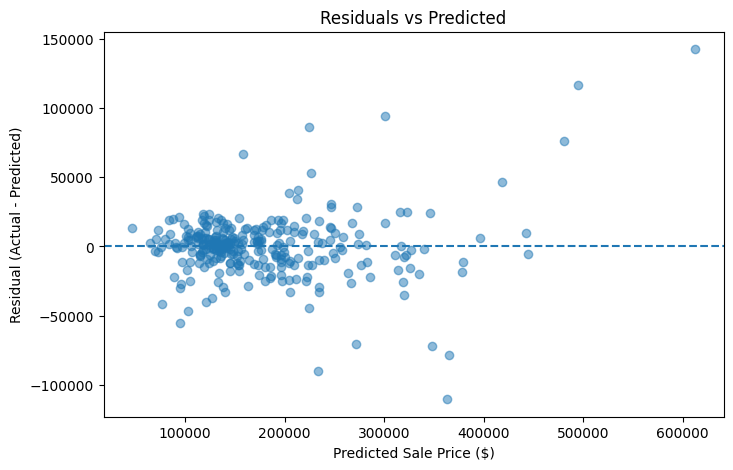

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Sale Price ($)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

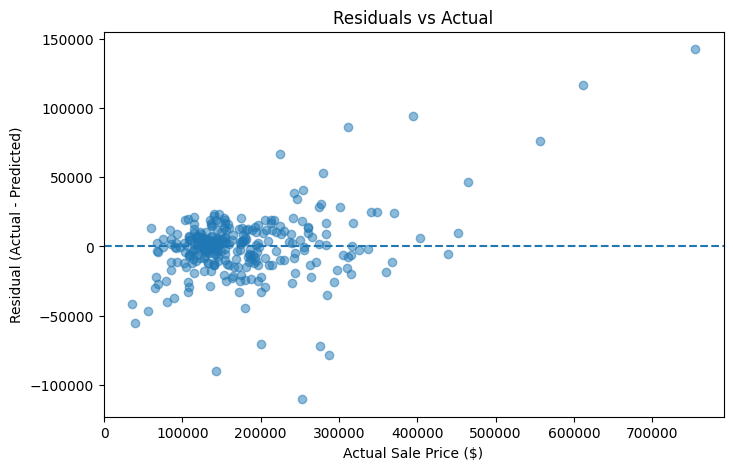

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Actual Sale Price ($)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual")
plt.show()

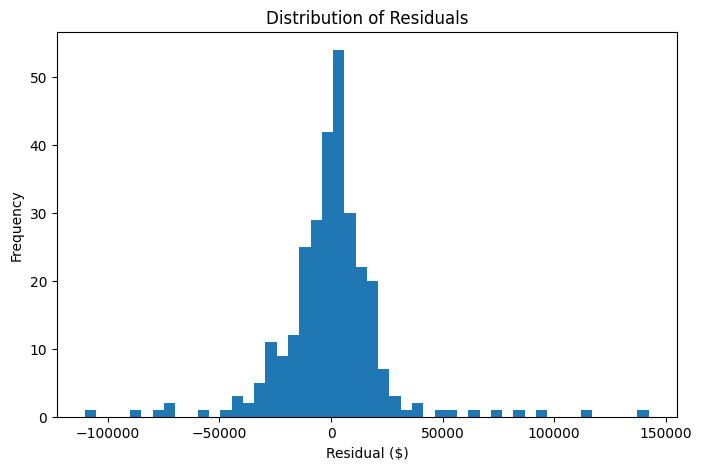

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50)
plt.xlabel("Residual ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

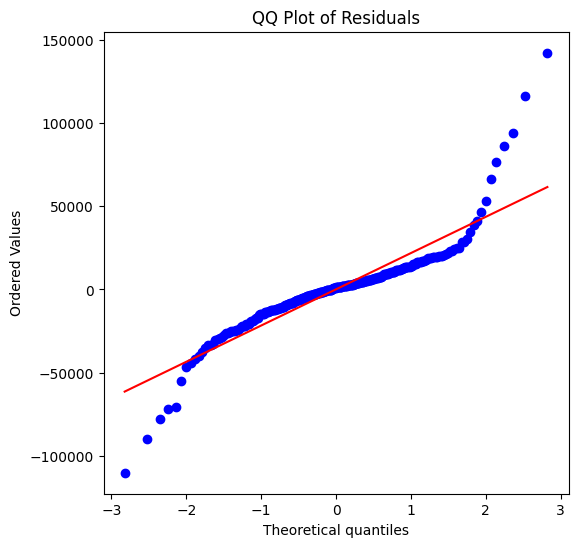

In [ ]:
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

In [ ]:
df_err = pd.DataFrame({"pred": pred, "actual": y_test, "resid": residuals})
df_err["pred_decile"] = pd.qcut(df_err["pred"], q=10, labels=False, duplicates="drop")

band = (df_err
        .groupby("pred_decile", as_index=False)
        .agg(count=("resid", "size"),
             rmse=("resid", lambda r: np.sqrt(np.mean(r**2))),
             mae=("resid", lambda r: np.mean(np.abs(r))),
             mean_pred=("pred", "mean"),
             mean_actual=("actual", "mean"))
       )
print("\nError by predicted decile:")
print(band)


Error by predicted decile:
   pred_decile  count          rmse           mae      mean_pred  \
0            0     30  19754.950629  13911.139714   87021.890625   
1            1     29  10620.349257   8293.315463  113016.546875   
2            2     29  14067.404653   9971.306843  125311.406250   
3            3     29  11123.063677   7570.787716  135309.953125   
4            4     29  10317.709833   7674.259698  145670.218750   
5            5     29  16724.400827  11354.778556  164743.500000   
6            6     29  14010.938672  12188.778017  188170.812500   
7            7     29  27807.483912  21132.518858  212254.593750   
8            8     29  26574.195799  17786.059267  252006.000000   
9            9     30  51785.372648  34991.515625  360913.812500   

     mean_actual  
0   83662.800000  
1  114990.827586  
2  126780.310345  
3  134723.827586  
4  144681.896552  
5  166644.482759  
6  185429.655172  
7  215585.448276  
8  247947.827586  
9  364819.900000  


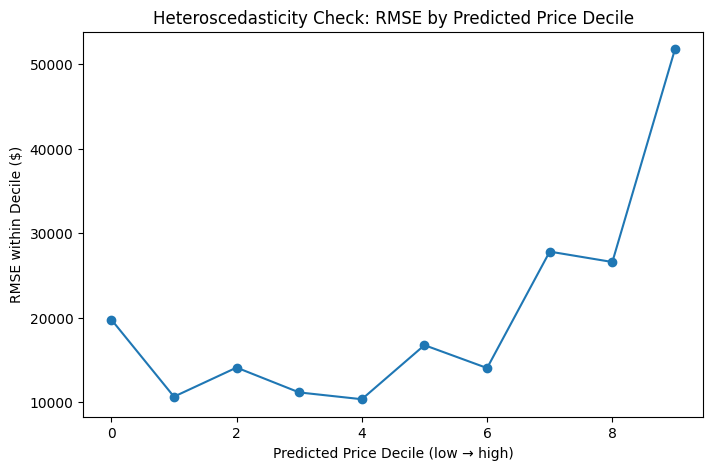

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(band["pred_decile"], band["rmse"], marker='o')
plt.xlabel("Predicted Price Decile (low → high)")
plt.ylabel("RMSE within Decile ($)")
plt.title("Heteroscedasticity Check: RMSE by Predicted Price Decile")
plt.show()

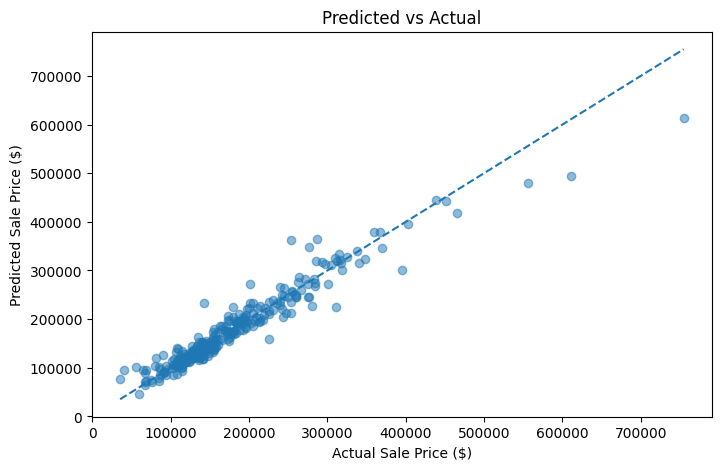

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, pred, alpha=0.5)
mn, mx = np.min([y_test.min(), pred.min()]), np.max([y_test.max(), pred.max()])
plt.plot([mn, mx], [mn, mx], linestyle='--')
plt.xlabel("Actual Sale Price ($)")
plt.ylabel("Predicted Sale Price ($)")
plt.title("Predicted vs Actual")
plt.show()

Residual analysis
Feature importance / SHAP
Cross-validation check
Ensemble blending


XGB model is doing well, but it underpredicts expensive houses and has heavy-tailed errors. Addressing heteroscedasticity (via log-target or feature engineering) will likely tighten RMSE further.

<Figure size 1000x800 with 0 Axes>

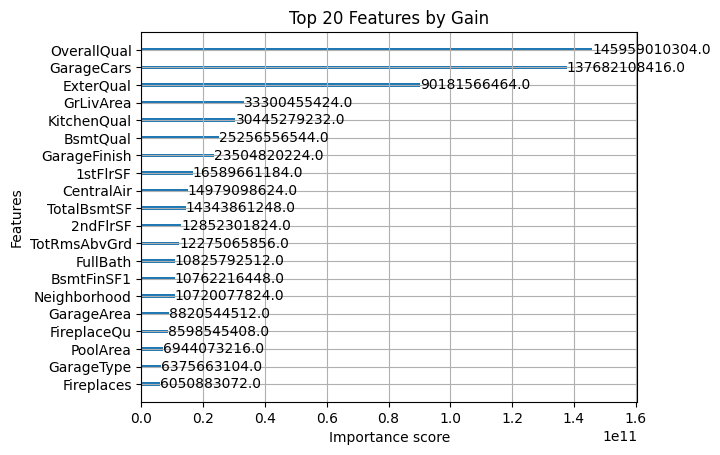

In [ ]:
from xgboost import plot_importance
plt.figure(figsize=(10,8))
plot_importance(xgb, importance_type="gain", max_num_features=20)
plt.title("Top 20 Features by Gain")
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb)
sv = explainer(X_train)

X_display = X_train.copy()
obj_cols = X_display.select_dtypes(include=["object", "category"]).columns
for c in obj_cols:
    X_display[c] = X_display[c].astype("string").fillna("NA")

In [ ]:
sv_disp = shap.Explanation(
    values=sv.values,
    base_values=sv.base_values,
    data=X_display.to_numpy(),
    feature_names=X_display.columns.tolist()
)

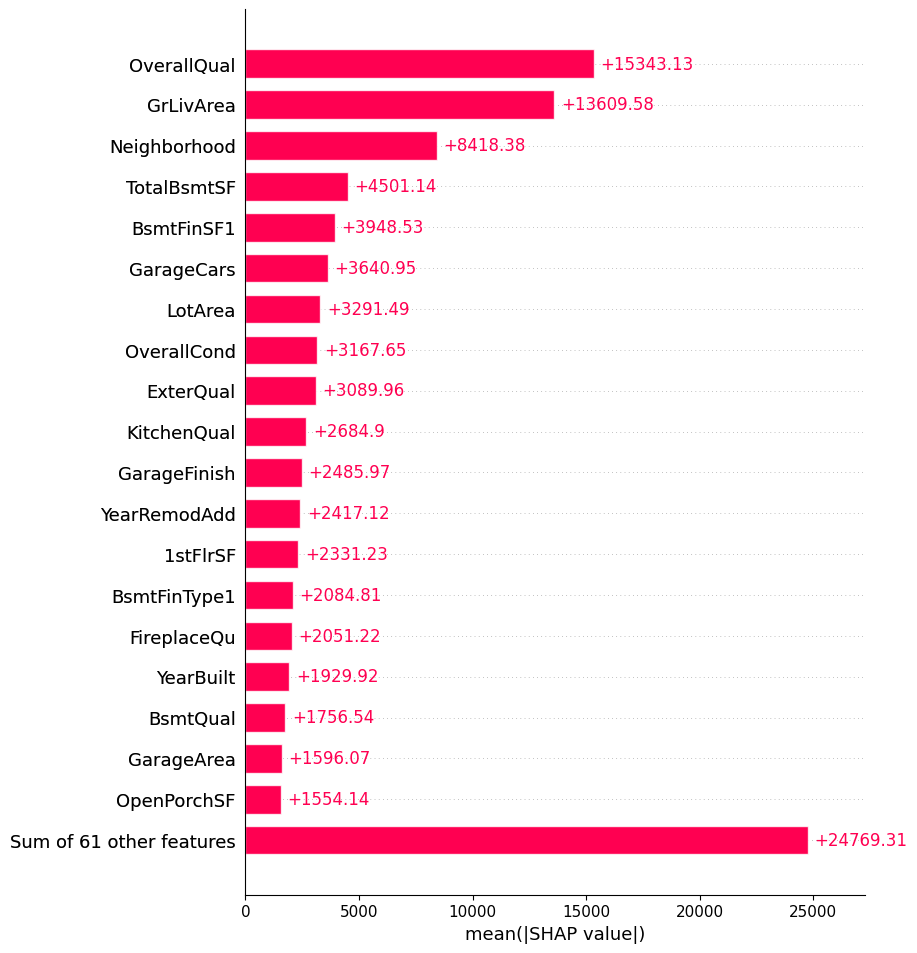

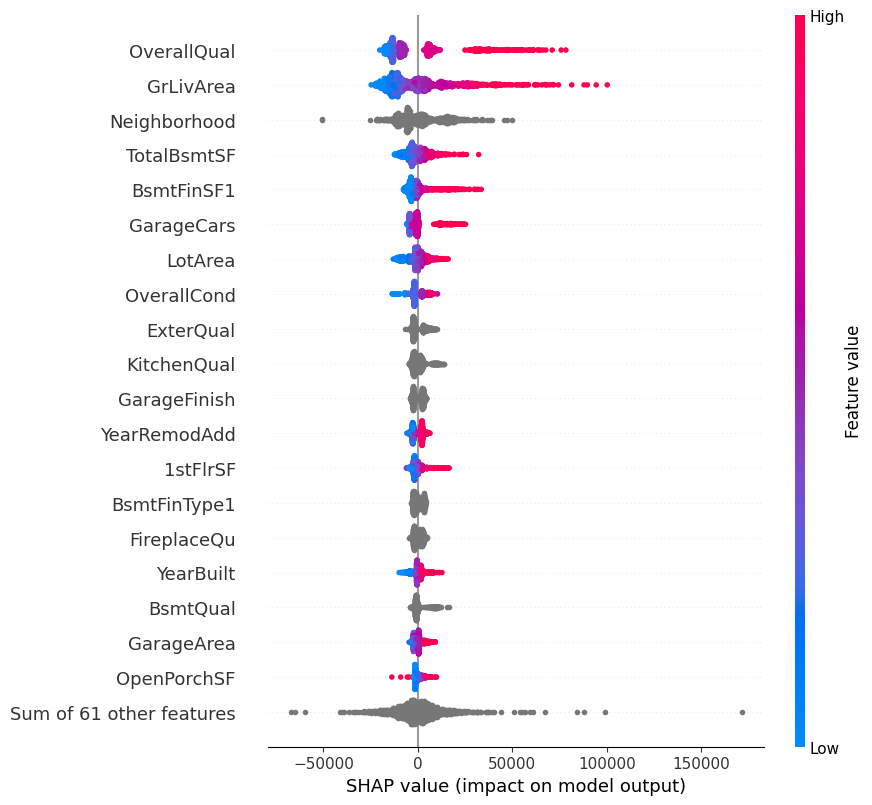

In [ ]:
shap.plots.bar(sv_disp, max_display=20)
shap.plots.beeswarm(sv_disp, max_display=20)

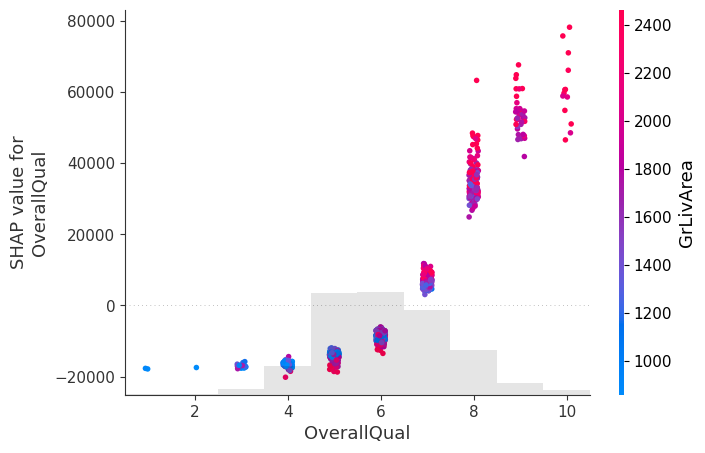

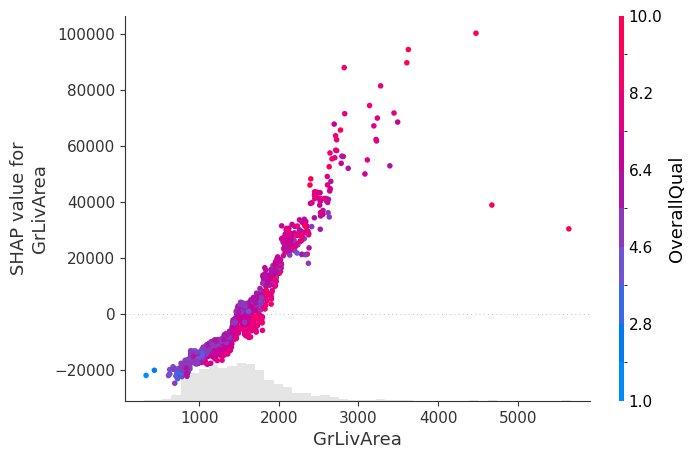

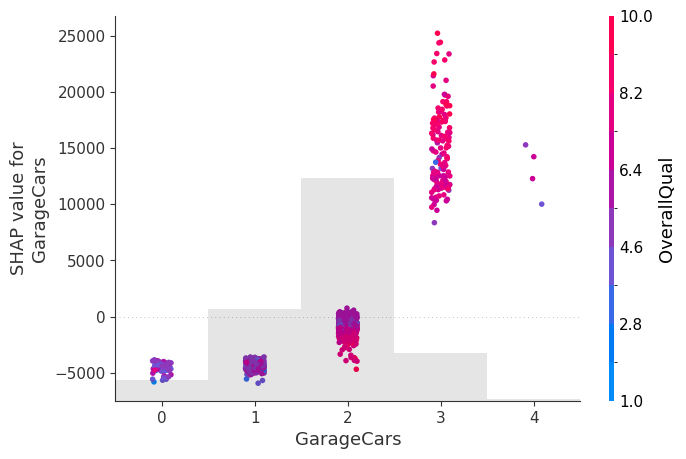

In [ ]:
shap.plots.scatter(sv_disp[:, "OverallQual"], color=sv_disp)
shap.plots.scatter(sv_disp[:, "GrLivArea"], color=sv_disp)
shap.plots.scatter(sv_disp[:, "GarageCars"], color=sv_disp)

In [ ]:
LABEL = "SalePrice"
best = {
    'xgb_n_estimators': 935,
    'xgb_max_depth': 3,
    'xgb_lr': 0.04078621020707325,
    'xgb_subsample': 0.7900071879843472,
    'xgb_colsample': 0.68075574530318,
    'xgb_l2': 0.8199380720864932
}

In [ ]:
tr = train_df.copy()
te = test_df.copy()

In [ ]:
tr["Qual_x_Size"] = tr["OverallQual"] * np.log1p(tr["GrLivArea"])
te["Qual_x_Size"] = te["OverallQual"] * np.log1p(te["GrLivArea"])

tr["TotalSF"] = tr["1stFlrSF"] + tr["2ndFlrSF"] + tr["TotalBsmtSF"]
te["TotalSF"] = te["1stFlrSF"] + te["2ndFlrSF"] + te["TotalBsmtSF"]

tr["LuxuryHome"] = (tr["GrLivArea"] > 4000).astype(int)
te["LuxuryHome"] = (te["GrLivArea"] > 4000).astype(int)

tr["GarageCars_capped"] = np.minimum(tr["GarageCars"], 3)
te["GarageCars_capped"] = np.minimum(te["GarageCars"], 3)

era_bins = [-np.inf, 1950, 1990, 2010, np.inf]
era_labels = ["pre1950", "1950-1990", "1990-2010", "post2010"]
tr["EraBuilt"] = pd.cut(tr["YearBuilt"], bins=era_bins, labels=era_labels)
te["EraBuilt"] = pd.cut(te["YearBuilt"], bins=era_bins, labels=era_labels)

nbh_median = tr.groupby("Neighborhood")[LABEL].median()
tier_edges = pd.qcut(nbh_median, q=3, retbins=True, labels=["low","mid","high"])[1]
nbh_tier = pd.cut(nbh_median, bins=tier_edges, labels=["low","mid","high"], include_lowest=True)
tr["NeighborhoodTier"] = tr["Neighborhood"].map(nbh_tier)
te["NeighborhoodTier"] = te["Neighborhood"].map(nbh_tier).astype("object").fillna("mid")

In [ ]:
cat_cols = (
    tr.select_dtypes(include=["object", "category"]).columns
    .union(pd.Index(["EraBuilt", "NeighborhoodTier"]))
    .intersection(tr.columns)
)

In [ ]:
tr = tr.copy()
te = te.copy()
for c in cat_cols:
    tr[c] = tr[c].astype("category")
    te[c] = pd.Categorical(te[c], categories=tr[c].cat.categories)

In [ ]:
X_train = tr.drop(columns=[LABEL])
y_train = tr[LABEL].to_numpy()
X_test  = te.drop(columns=[LABEL])
y_test  = te[LABEL].to_numpy()

In [ ]:
xgb = XGBRegressor(
    n_estimators=best['xgb_n_estimators'],
    max_depth=best['xgb_max_depth'],
    learning_rate=best['xgb_lr'],
    subsample=best['xgb_subsample'],
    colsample_bytree=best['xgb_colsample'],
    reg_lambda=best['xgb_l2'],
    tree_method="hist",
    enable_categorical=True,
    random_state=42,
    n_jobs=-1,
    eval_metric="rmse"
)

xgb.fit(X_train, y_train, verbose=False)
pred = xgb.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae  = mean_absolute_error(y_test, pred)
mape = np.nanmean(np.abs((y_test - pred) / np.where(y_test==0, np.nan, y_test))) * 100

print({
    "Holdout_RMSE_$": f"{rmse:,.0f}",
    "Holdout_MAE_$": f"{mae:,.0f}",
    "Holdout_MAPE_%": f"{mape:.2f}"
})

{'Holdout_RMSE_$': '24,921', 'Holdout_MAE_$': '15,271', 'Holdout_MAPE_%': '9.12'}


##Conclusion
On the Kaggle House Prices data (1460 rows, 81 features), I ran four TF-DF baselines—GradientBoostedTreesLearner, RandomForestLearner, CartLearner, and DecisionTreeLearner—where **RandomForestLearner** was best with **CV RMSE ≈ 29,664.55** using `rf_num_trees=562`, `rf_max_depth=17`, `rf_bootstrap=False`, `rf_feature_frac≈0.2019`; feature-importance audits across **SUM\_SCORE, NUM\_AS\_ROOT, NUM\_NODES, INV\_MEAN\_MIN\_DEPTH** consistently ranked **OverallQual, Neighborhood, GrLivArea** as dominant (e.g., SUM\_SCORE: OverallQual≈7.19e14, Neighborhood≈4.31e14, GrLivArea≈4.25e14; NUM\_AS\_ROOT counts: OverallQual=124, ExterQual=99, GarageCars=75, Neighborhood=65, GrLivArea=49; NUM\_NODES heavy users included GrLivArea=9066, Neighborhood=9030, TotalBsmtSF=5658; INV\_MEAN\_MIN\_DEPTH kept OverallQual/Neighborhood/GrLivArea at \~0.19/0.19/0.18), while **LotArea, BsmtFinSF1, GarageArea** appeared frequently even when not top by SUM\_SCORE—suggesting they’re broadly useful splitters rather than the strongest reducers. Errors showed **heteroscedasticity** and **underfit on expensive homes**; in **log space** I observed **RMSE=0.1427, MAE=0.0914**, which corresponded to about **\$27,491 RMSE** and **\$15,903 MAE** in dollar space for that run. A broader compare of **XGBRegressor, LGBMRegressor, YDF\_GBT, YDF\_RF** yielded a best **CV RMSE ≈ 26,518.68 (\$)** with **XGB** (`n_estimators=935`, `max_depth=3`, `lr≈0.0408`, `subsample≈0.79`, `colsample≈0.6808`, `l2≈0.8199`), and its **holdout** was strongest (**RMSE \$23,739; MAE \$14,555; log-RMSE 0.1346; log-MAE 0.0850**). I then added lightweight **FE**—`Qual_x_Size=OverallQual*log1p(GrLivArea)`, `TotalSF=1stFlrSF+2ndFlrSF+TotalBsmtSF`, `LuxuryHome=(GrLivArea>4000)`, `GarageCars_capped=min(GarageCars,3)`, binned `EraBuilt`, and `NeighborhoodTier` (from neighborhood medians)—which in one XGB variant produced **holdout RMSE \$24,921; MAE \$15,271; MAPE 9.12%** (i.e., not beating the best XGB). I did **not** drop >50%-missing columns or run a “top-features-only” experiment. **Bottom line:** XGB (hist) with careful tuning is the current winner; **next steps** are to standardize training/selection in **log space**, add **early stopping** and **5-fold stratified CV**, try a **small blend (XGB+LGBM+YDF\_GBT)**, optionally prune high-missing columns, and test a **top-features subset**—all likely to yield incremental, repeatable gains.